# Asociación e independencia entre variables

[Pruebas en R](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/ )

## Cargar librerías

## Librerías Utilizadas durante la clase

- [tydiverse](https://github.com/tidyverse/tidyverse): Es un conjunto de paquetes en R diseñados para ciencia de datos. Esto lo que significa es que ayuda en todo el proceso de importar transformar visualizar modelar y comunicar toda la información que normalmente utilizamos en procesos de ciencia de datos.
- [ggplot2](https://github.com/tidyverse/ggplot2): Es un sistema para crear gráficos de forma declarativa.
- [GGally](https://github.com/cran/GGally): Extiende ggplot2 agregando varias funciones para reducir la complejidad de combinar geoms con datos transformados.
- [repr](https://github.com/IRkernel/repr): Este paquete existe para crear de manera confiable representaciones de datos de texto legible (e imagen visible) sin los efectos secundarios que print () puede causar, como invocar un buscapersonas y trazar en un dispositivo de trazado. En otras palabras, todas las funciones y métodos de repr son puros.

In [1]:
# install.packages("repr")
library("repr")
options(repr.plot.width = 14, repr.plot.height=10)

In [2]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Importar datos

In [3]:
read_delim(
  file = "project_association_and_independence/data/winequality-red.csv",
  delim = ",", 
  locale=locale(decimal_mark = ".")
  ) -> wine_raw

## Revisar la estructura de los datos
str(wine_raw)

## Le decimos a R que vamos a trabajar con esos datos y se los ponemos "en primer plano"
attach(wine_raw)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



tibble [1,599 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ fixed acidity       : num [1:1599] 7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile acidity    : num [1:1599] 0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric acid         : num [1:1599] 0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual sugar      : num [1:1599] 1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num [1:1599] 0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free sulfur dioxide : num [1:1599] 11 25 15 17 11 13 15 15 9 17 ...
 $ total sulfur dioxide: num [1:1599] 34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num [1:1599] 0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num [1:1599] 3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num [1:1599] 0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num [1:1599] 9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : num [1

## Información sobre el conjunto de datos

### Información general

Los datos corresponden a una variación de un vino tradicional portugués llamado “Vinho Verde” proveniente de una región llamada Vinho, ubicada muy al norte de Portugal.

### Variables

- **fixed acidity:** ácidos del vino que no se evaporan fácilmente.
- **volatile acidity:** cantidad de ácido acético en el vino, el cual en altas cantidades genera sensaciones no placenteras y un sabor vinagroso.
- **citric acid:** cantidad de ácido cítrico en pequeñas cantidades, el cual añade cierta frescura y sabor al vino.
- **residual sugar:** cantidad de azucar residual luego del proceso de fermentación. Es raro tener menos de 1g/litro y los vinos con más de 45g/litro se consideran dulces.
- **chlorides:** cantidad de sal en el vino.
- **free sulfur dioxide:** cantidad de dióxido de azufre ($S0_2$) libre, el cual previene el crecimiento de microbios y la oxidación del vino.
- **total sulfur dioxide:** cantidad total de dióxido de azufre ($S0_2$) en forma libre y fija; en bajas concentraciones es indetectable, en concentraciones superiores a 50ppm el $S0_2$ es evidente para la nariz y el sabor del vino.
- **density:** la densidad del vino es cercana a la del agua dependiendo de la cantidad de azucar y alcohol.
- **pH:** describe qué tan ácido o básico es un vino en un escala desde cero (muy ácido) hasta 14 (muy básico); la gran mayoría de vinos tienen un pH entre 3-4.
- **sulphates:** un aditivo que contribuye a regular los niveles de dióxido de azufre ($S0_2$), el cual actúa como antimicrobios y antioxidante.
- **alcohol:** porcentaje del alcohol del vino.
- **quality:** puntuación del vino basada en datos sensoriales, en una escala entre 0 y 10.

### Fuente

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553.

**Nota:** Es **muy importante** tener un contexto sobre el conjunto de datos.

## Dimensionalidad de los datos

In [4]:
dim(wine_raw)

[1] 1599   12

Todos los cálculos y procedimientos matemáticos y estadísticos, a nivel computacional, se realizan mediante operaciones sobre matrices.

In [5]:
## Obtener solo el número de filas
nrow(wine_raw)

[1] 1599

In [6]:
## Obtener solo el número de columnas
ncol(wine_raw)

[1] 12

## Limpieza de los datos

En la práctica la calidad de los datos puede estar afectada por los procesos de captura, sistematización y distribución. **Siempre** hay que verificar la calidad de nuestros datos.

- Nombrado adecuado de las variables
- Datos faltantes
- Valores duplicados

### Nombrado adecuado de las variables
- [Cómo nombrar las cosas](http://www2.stat.duke.edu/~rcs46/lectures_2015/01-markdown-git/slides/naming-slides/naming-slides.pdf)

Vamos a dejar los nombres de las columnas sin espacios.

In [7]:
names(wine_raw) <- str_replace_all(names(wine_raw), c(" " = "_"))

### Datos faltantes

In [8]:
sapply(wine_raw, function(x) sum(is.na(x)))

fixed_acidity     volatile_acidity          citric_acid 
                   0                    0                    0 
      residual_sugar            chlorides  free_sulfur_dioxide 
                   0                    0                    0 
total_sulfur_dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

En caso que se encuentren datos faltantes se pueden utilizar procesos de imputación de datos, entre otros:
- Usando la media de la variable
- HotDeck
- MICE

### Valores duplicados

Podemos buscar y eliminar duplicados basados en un columna, por ejemplo, cuando esperamos tener datos únicos de un individuo y tenemos una columna para identificarlo.

In [9]:
## Ejemplo: acá dejamos valores únicos en la columna pH
distinct(wine_raw, pH, .keep_all = TRUE)

## Ejemplo: acá dejamos valores únicos en la columna density
distinct(wine_raw, density, .keep_all = TRUE)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5
6.7,0.580,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
6.7,0.580,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
5.6,0.615,0.00,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5
7.8,0.610,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5


Podemos buscar y eliminar duplicados basados en toda la fila.

In [10]:
distinct(wine_raw)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


## Análisis descriptivo

### Resumen numérico

El método **summary()** que trae por defecto R nos brinda estadísticas de resumen para cada una de las variables de nuestro conjunto de datos.

In [11]:
## Resumen básico de datos
summary(wine_raw)

 fixed_acidity   volatile_acidity  citric_acid    residual_sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free_sulfur_dioxide total_sulfur_dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

### Resumen gráfico

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



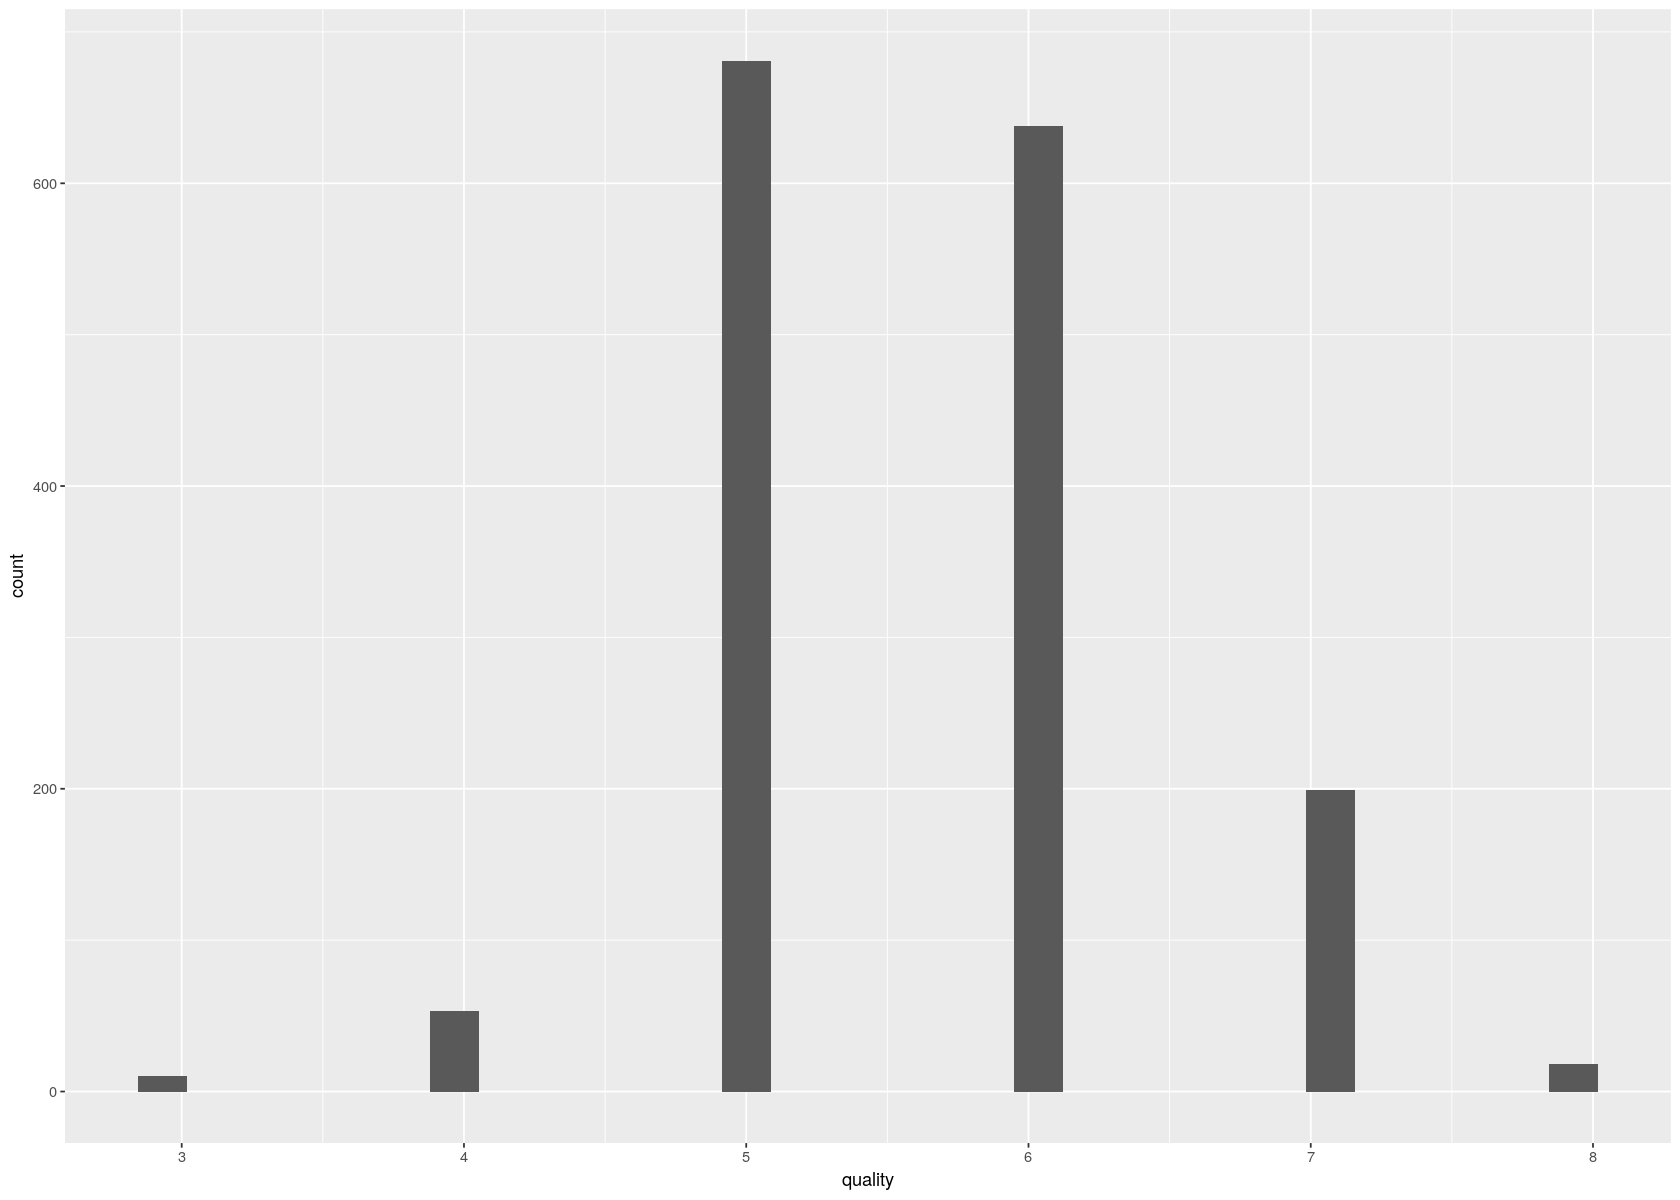

In [12]:
## Cargamos la librería ggplot2
library(ggplot2)

## Usamos el método para graficar histogramas
## Seleccionamos como objetivo la variable quality
ggplot(wine_raw, aes(quality)) +
    geom_histogram()

## Efectos de una variable sobre otra

En una investigación o estudio podemos sospechar de la influencia o efecto de un conjunto de variables sobre una variable particular de interés (**CTQ: Critical to quality**). Una parte esencial de la fase de análisis es reunir evidencia estadística suficiente para seleccionar las variables que sí tienen un efecto real sobre nuestra variable de interés.

![Influencia](images/R_00.png)

Existen distintas herramientas estadísticas para tener una idea bien formada de cómo se relacionan dos o más variables entre sí.

Antes de explorar dichas herramientas, conviene hacer una revisión sobre algunos conceptos.

### Asociación entre dos variables contínuas

La **covarianza** es una medida numérica que nos permite cuantificar la relación (lineal) entre dos variables contínuas.

$$ Cov(X, Y) = E[(X-E(X))(Y-E(Y))]$$

Su estimador es la covarianza muestral:

$$ s_{XY}=\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) $$

- Si dos variables son **independientes** su covarianza es nula. El reciproco no es cierto en general, si dos variables tienen covarianza nula se dice que son incorreladas (no hay relación lineal, aunque puede haber una relación no lineal).
- Si la covarianza es positiva indica que a valores grandes de $X$ le corresponden valores grandes de $Y$ (i.e. al incrementar $X$ se incrementa $Y$) y se dice que hay una relación lineal positiva.
- Si la covarianza es negativa indica que a valores grandes de $X$ le corresponden valores pequeños de $Y$ (i.e. al incrementar X, Y disminuye) y se dice que hay una relación lineal negativa.

Cuanto mayor es el valor (absoluto) de la covarianza, mayor es el grado de relación lineal entre las variables. Sin embargo, su valor depende de las escala de las variables por lo que es difícil determinar cuando es grande o pequeña. Para medir el grado de relación lineal puede ser preferible reescalarla, i.e. emplear el **coeficiente de correlación:**

$$ \rho(X,Y) = \frac{Cov(X,Y)}{\sigma(X)\sigma(Y)} $$

Su estimador es el coeficiente de correlación muestral:

$$ r_{XY}= \frac{\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}} $$


- Una correlación positiva entre dos variables indica que a medida que los valores de una variable crecen los valores de la otra variable también crecen. Y viceversa. El máximo valor de una correlación positiva es 1.
- Una correlación negativa entre dos variables indica que a medida que los valores de una variable crecen los valores de la otra variable decrecen. El máximo valor de una correlación negativa es -1.
- Una correlación de cero entre dos variables indica que no existe una asociación lineal entre ellas.

Dado que el trabajo estadístico de datos es principalmente matricial y tenemos un número finito de **variables aleatorias**, en vez de calcular la covarianza entre dos variables podemos construir una **matriz de covarianzas** y calcular las covarianzas entre todas las variables.


#### Covarianzas en R

In [13]:
## Covarianzas entre dos variables
cov(wine_raw$fixed_acidity, wine_raw$quality)

[1] 0.1744236

In [14]:
cov(wine_raw$chlorides, wine_raw$quality)

[1] -0.004899545

In [15]:
## Correlaciones entre dos variables
cor(wine_raw$fixed_acidity, wine_raw$quality, method = 'pearson')

[1] 0.1240516

In [16]:
cor(wine_raw$chlorides, wine_raw$quality, method = 'pearson')

[1] -0.1289066

In [17]:
## Matriz de correlaciones
cor(wine_raw, method = 'pearson')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827,0.12405165
volatile_acidity,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803,-0.39055778
citric_acid,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325,0.22637251
residual_sugar,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544,0.01373164
chlorides,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054,-0.12890656
free_sulfur_dioxide,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835,-0.05065606
total_sulfur_dioxide,-0.11318144,0.076470005,0.03553302,0.203027882,0.047400468,0.667666450,1.00000000,0.07126948,-0.06649456,0.042946836,-0.20565394,-0.18510029
density,0.66804729,0.022026232,0.36494718,0.355283371,0.200632327,-0.021945831,0.07126948,1.00000000,-0.34169933,0.148506412,-0.49617977,-0.17491923
pH,-0.68297819,0.234937294,-0.54190414,-0.085652422,-0.265026131,0.070377499,-0.06649456,-0.34169933,1.00000000,-0.196647602,0.20563251,-0.05773139
sulphates,0.18300566,-0.260986685,0.31277004,0.005527121,0.371260481,0.051657572,0.04294684,0.14850641,-0.19664760,1.000000000,0.09359475,0.25139708


Por defecto el método **cor()** calcula una correlación de Pearson, por tanto, el resultado numerico asume que la relación entre las variables es lineal. Dado que en la practica hay muchas relaciones no lineales, una forma más robusta de calcular la asociación es calculando una **correlación de Spearman** (method = ‘spearman’) o el estadístico **Tau de Kendall** (method = ‘kendall’).

Que exista una asociación fuerte entre dos variables no implica una relación causal. Para testear la causalidad veremos otras herramientas más adelante.

#### Visualización de la relación entre variables

Hemos visto que podemos crear gráficos univariados para tener una fotografía del comportamiento de una variable. De igual manera, es posible construir gráficos que muestren la asociación entre dos o más variables.

| Variable 1 | Variable 2 | Visualización |
| :---: | :---: | :---: |
| Categórica | Categórica | Tablas de contingencia |
| Categórica | Contínua | Boxplot por grupos |
| Contínua | Contínua | Diagrama de dispersón |

Para nuestro ejemplo del vino rojo, siguiendo las recomendaciones de la tabla, conviene crear diagramas de dispersión.

#### Diagrama de dispersión

Son útiles porque al cruzar los valores de un par de variables podemos encontrar posibles relaciones matemáticas entre ellas.

![Relación de variables continuas](images/R_01.png)

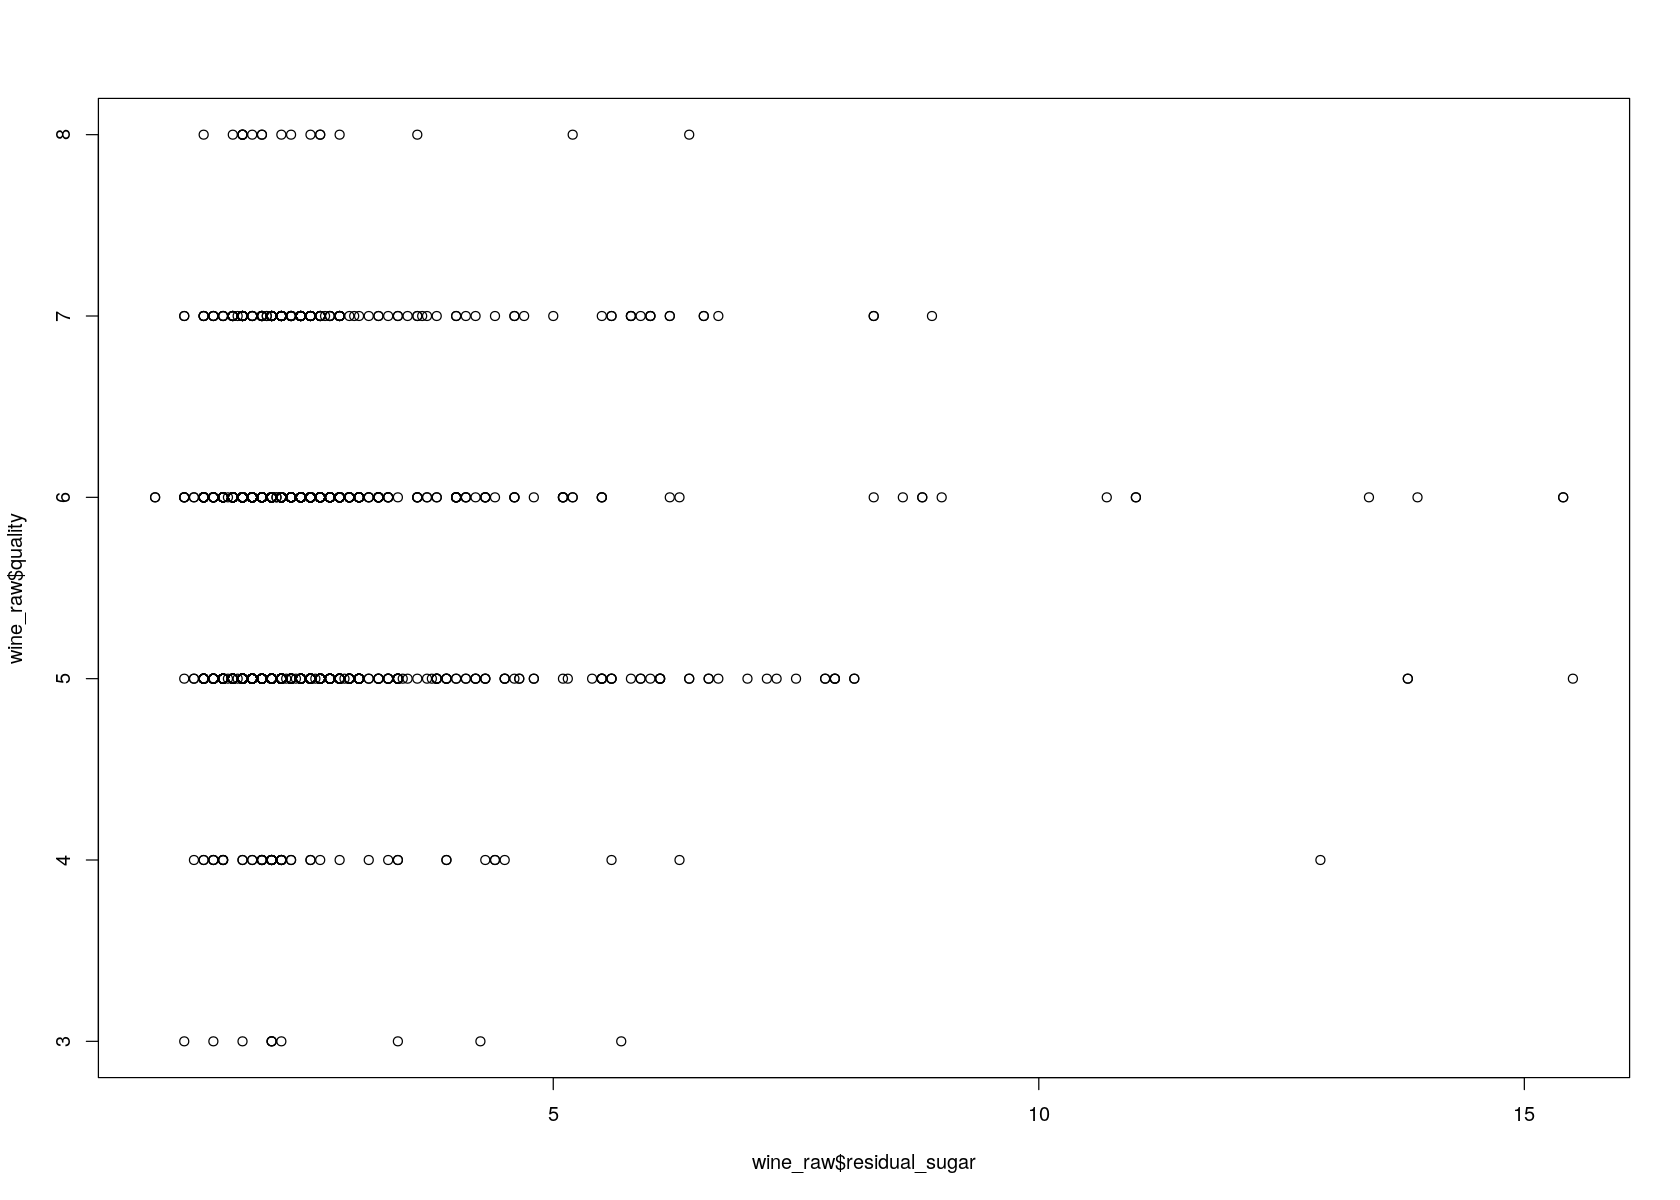

In [18]:
## Una relación lineal inexistente
plot(wine_raw$residual_sugar, wine_raw$quality)

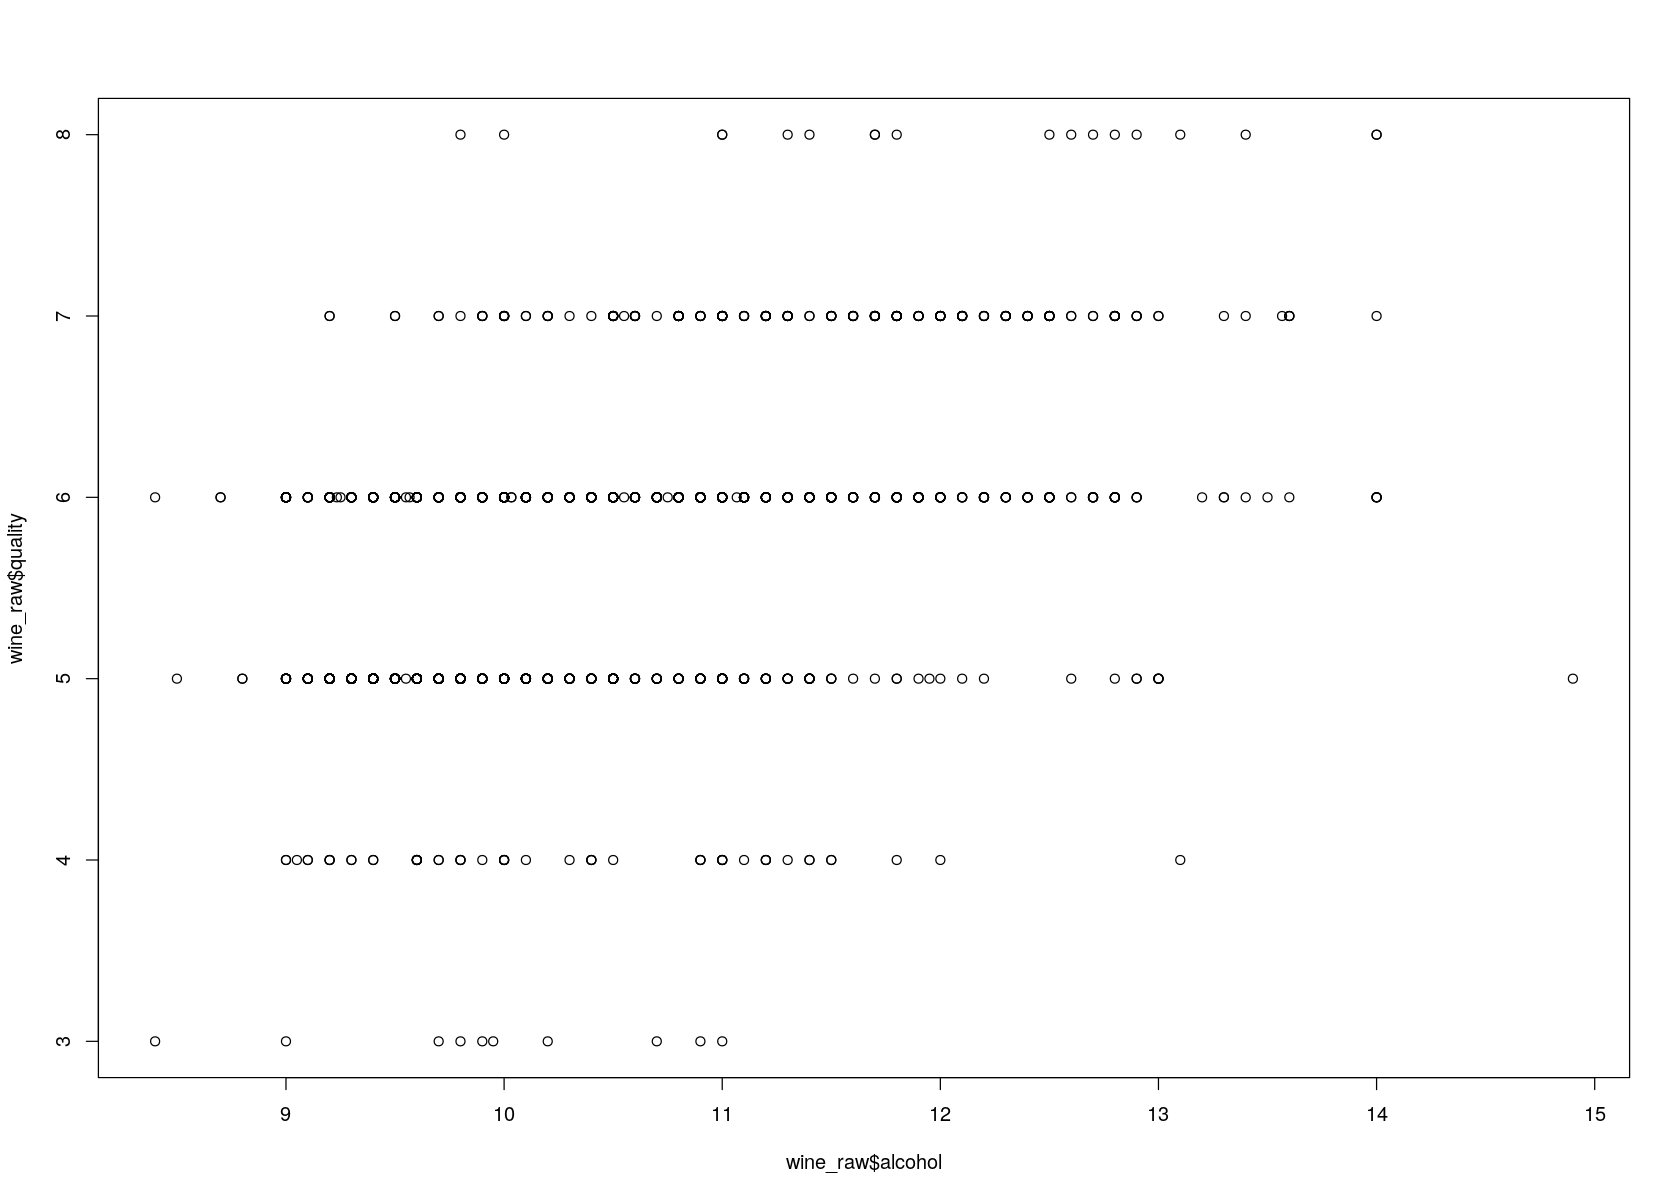

In [19]:
## Una relación lineal positiva
plot(wine_raw$alcohol, wine_raw$quality)

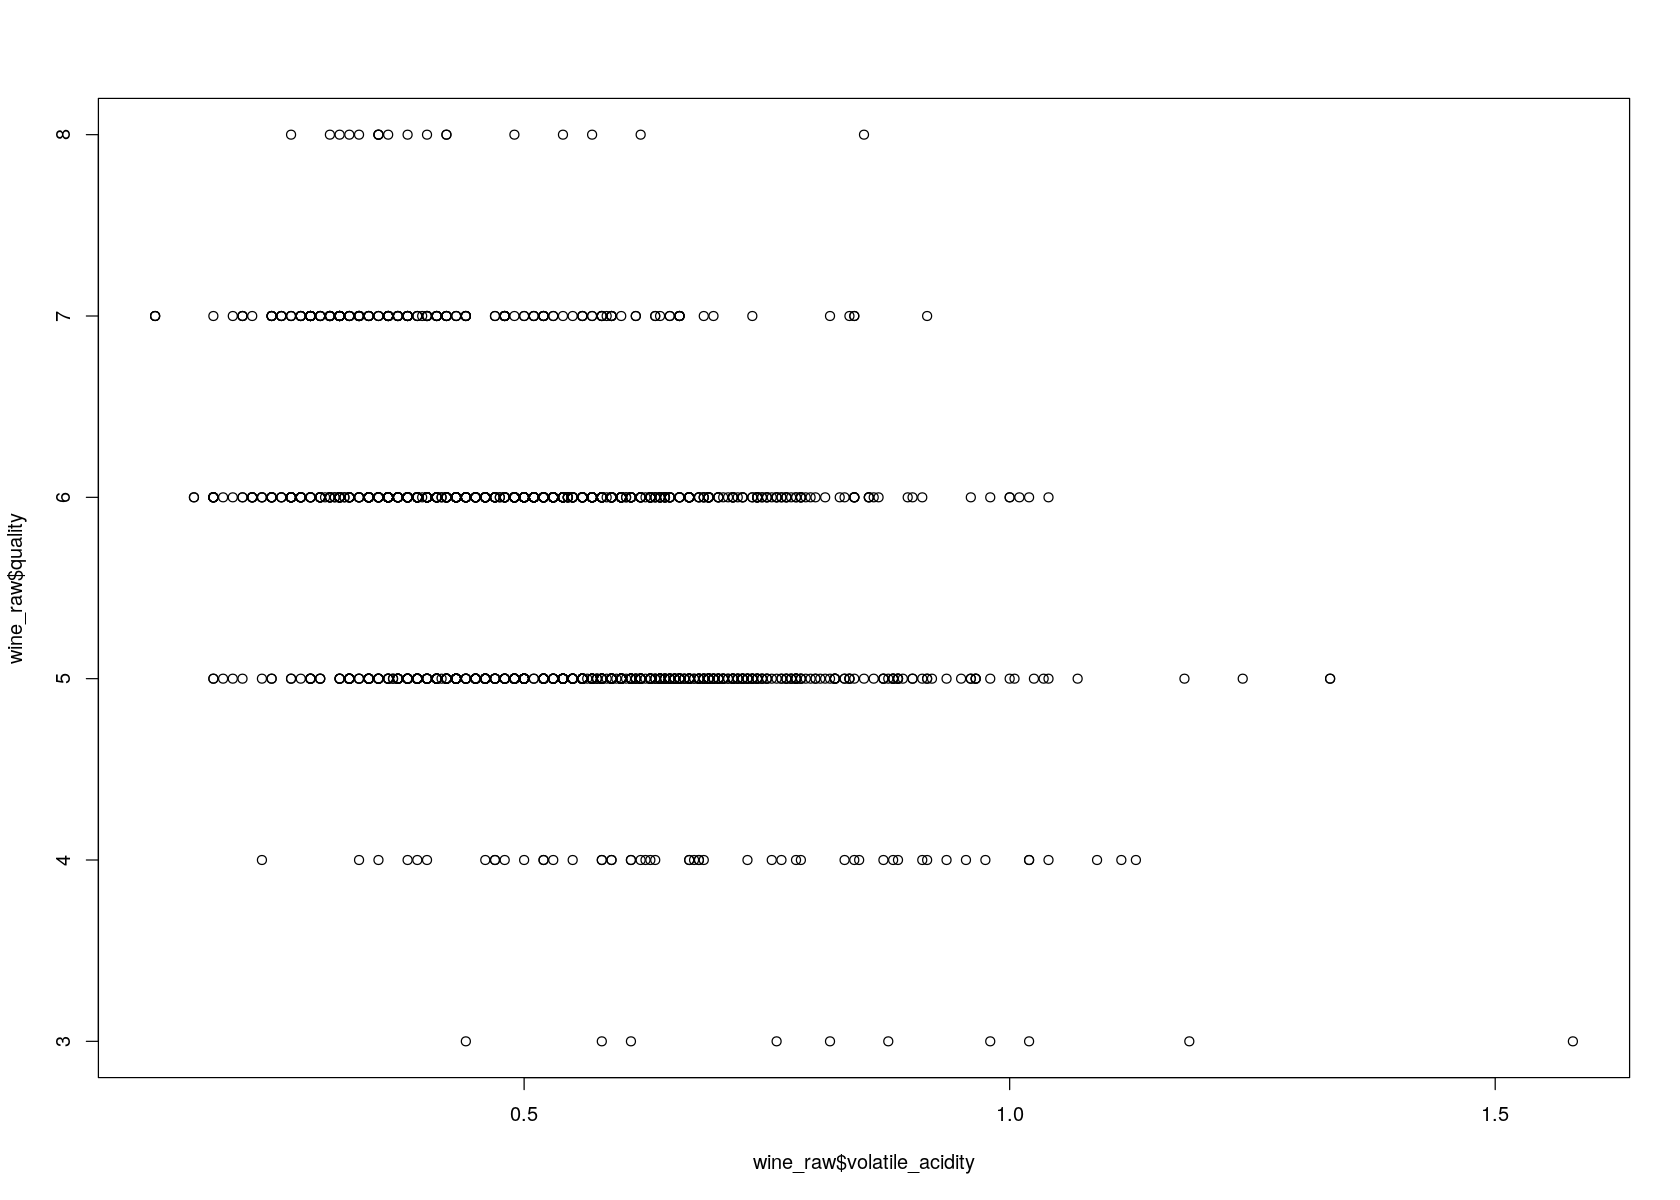

In [20]:
## Una relación lineal negativa
plot(wine_raw$volatile_acidity, wine_raw$quality)

#### Correlogramas

Podemos crear una visualización donde se muestren todos los posibles diagramas de dispersión entre parejas de variables con sus respectivos coeficientes de correlación.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



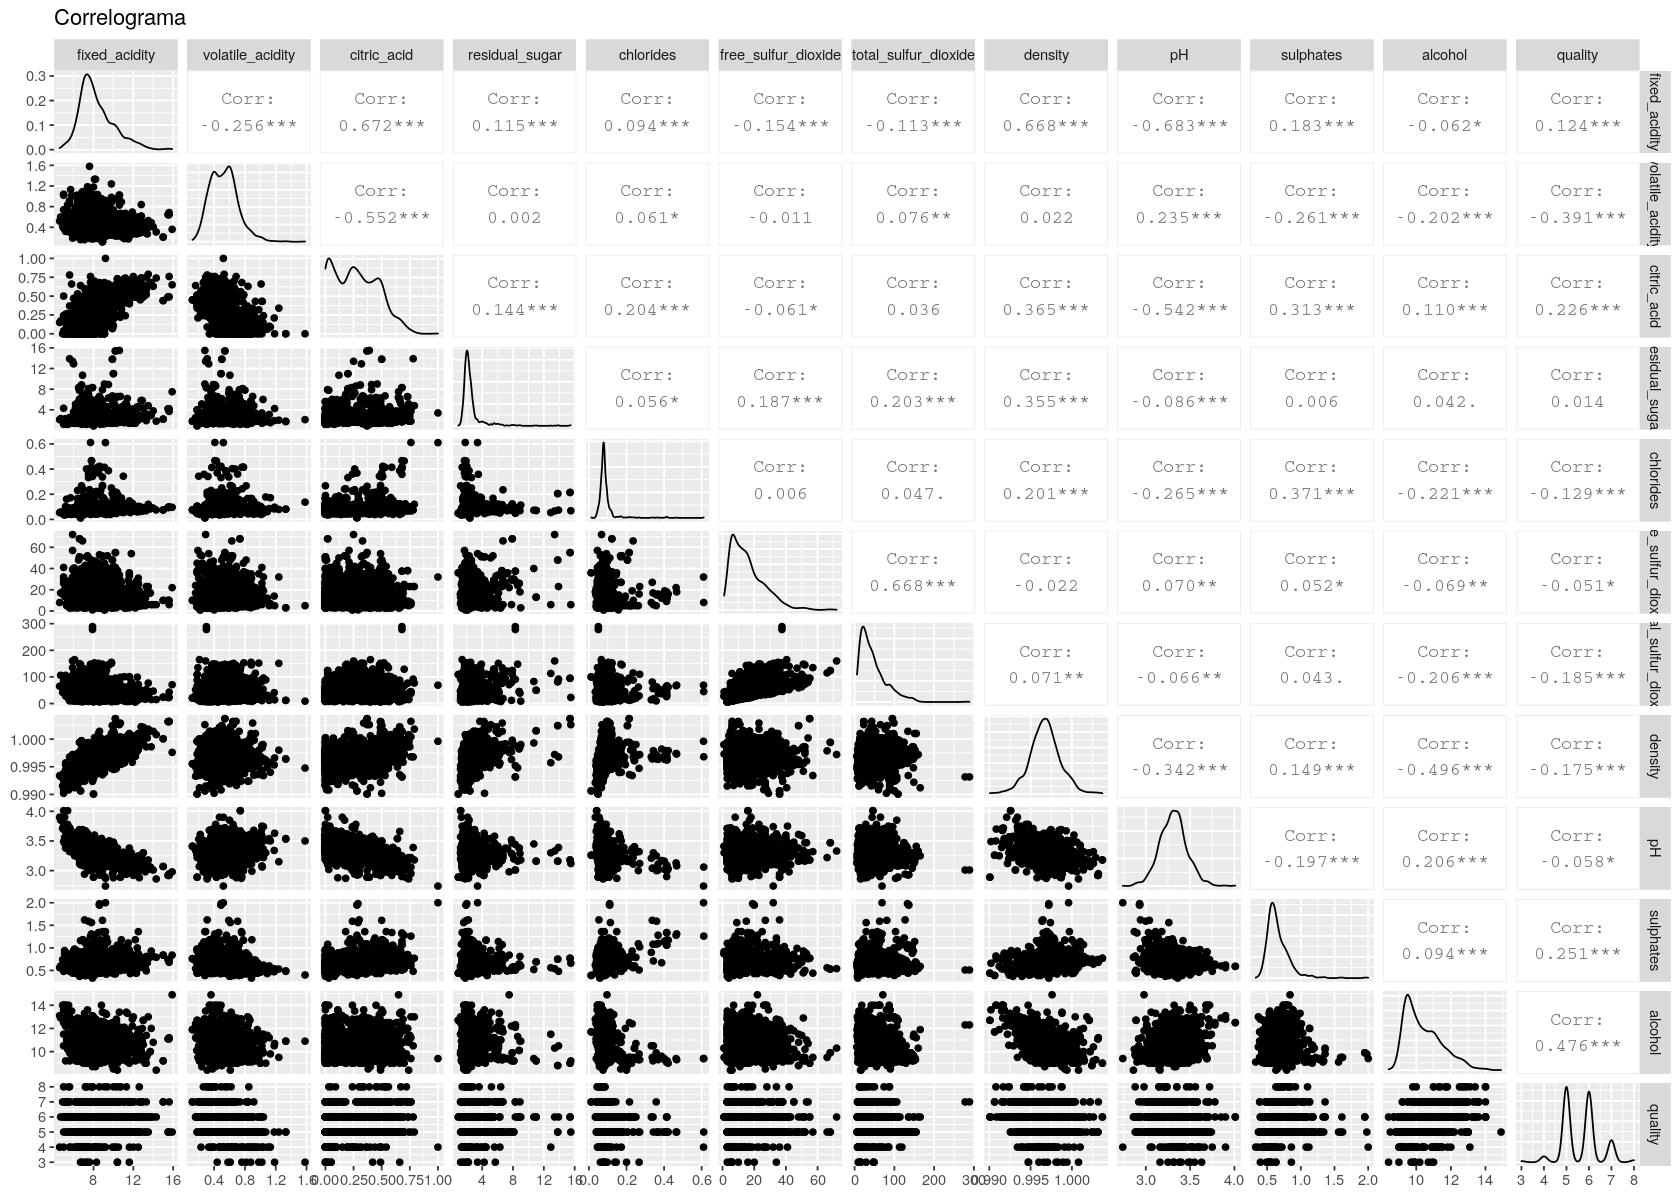

In [21]:
## Instalamos la librería GGally
#install.packages('GGally')

## Cargamos la librería
library('GGally')

## Creamos la visualización usando el método ggpairs()
ggpairs(
  wine_raw, 
  title="Correlograma"
  ) 

Podemos graficar filtrando ciertas variables de interés. En este caso, vamos a remover aquellas que tengan un coeficiente de correlación menor a 0.2 con nuestra variable CTQ (quality).

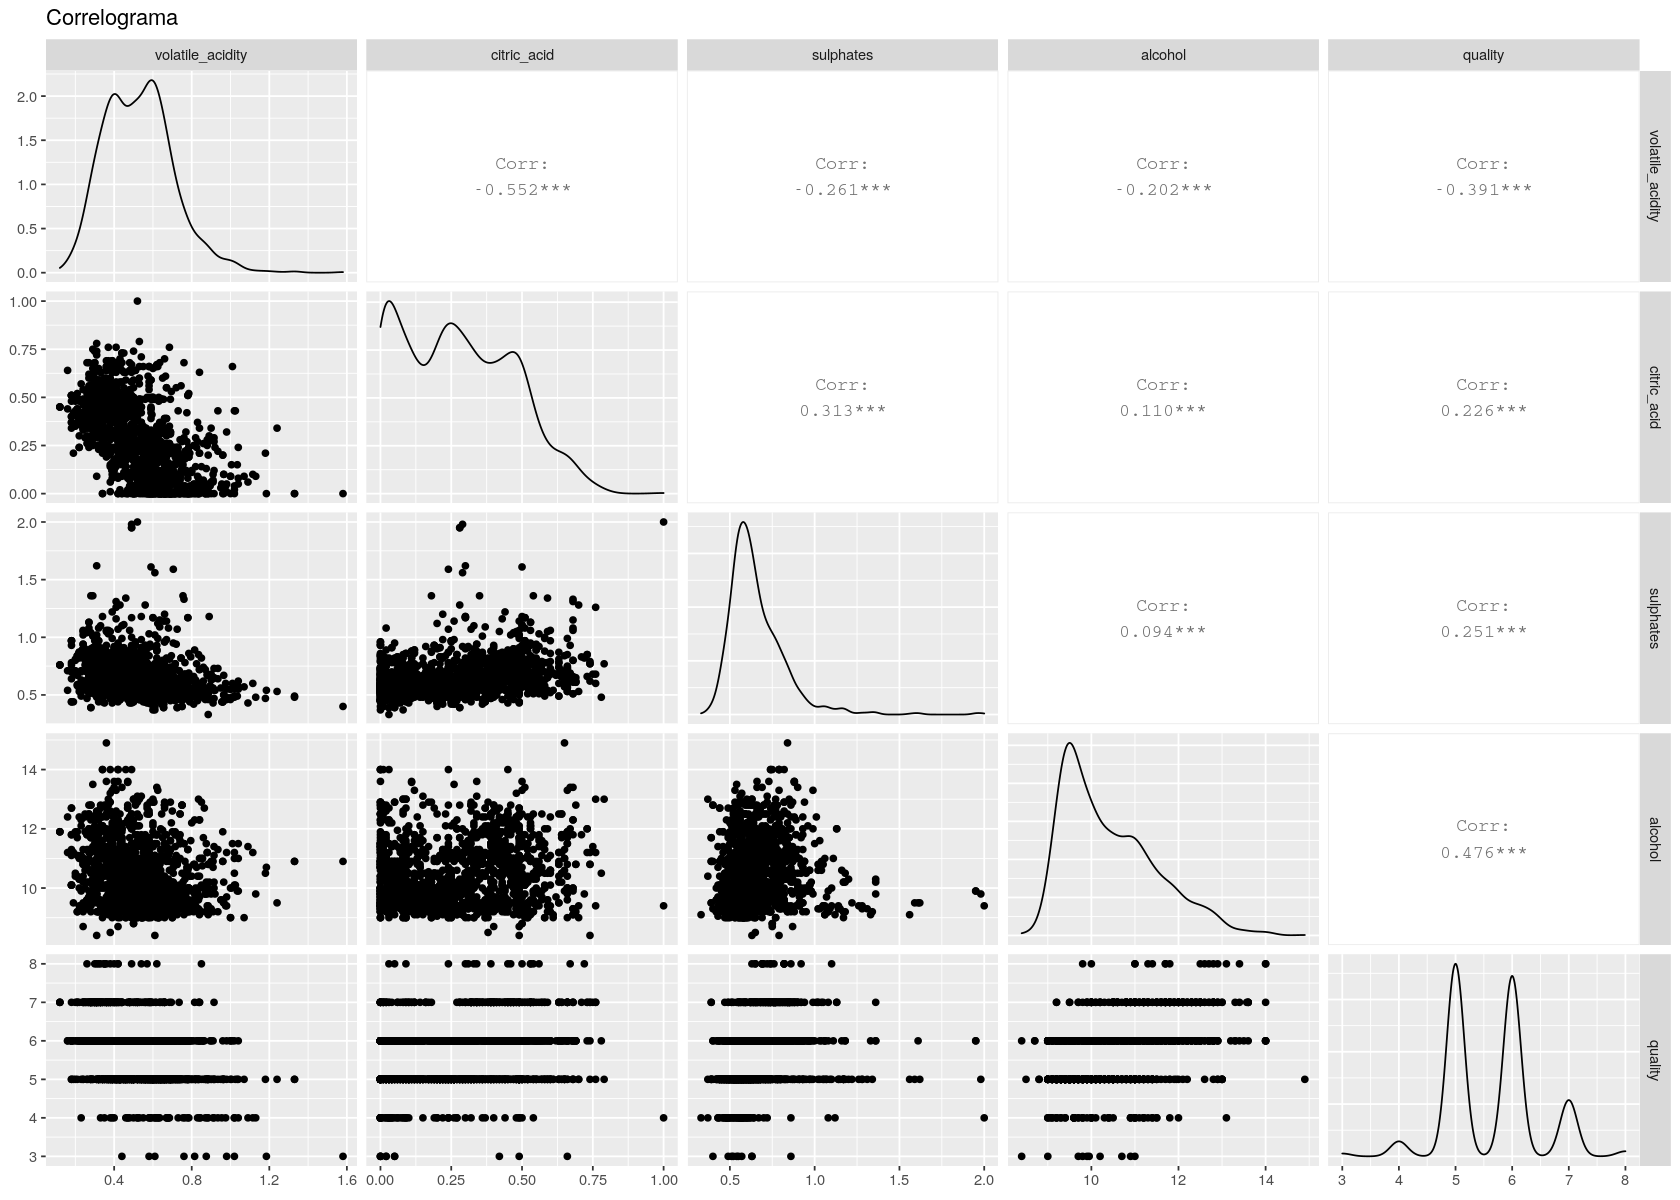

In [22]:
## Declaramos un vector con nuestras variables de interés
var_interes = c('volatile_acidity','citric_acid','sulphates','alcohol','quality')

## Creamos la visualización usando el método ggpairs() agregando el parámetro columns
ggpairs(
  wine_raw, 
  title="Correlograma",
  columns = var_interes
  ) 

Otra forma de visualizar la correlación entre variables.

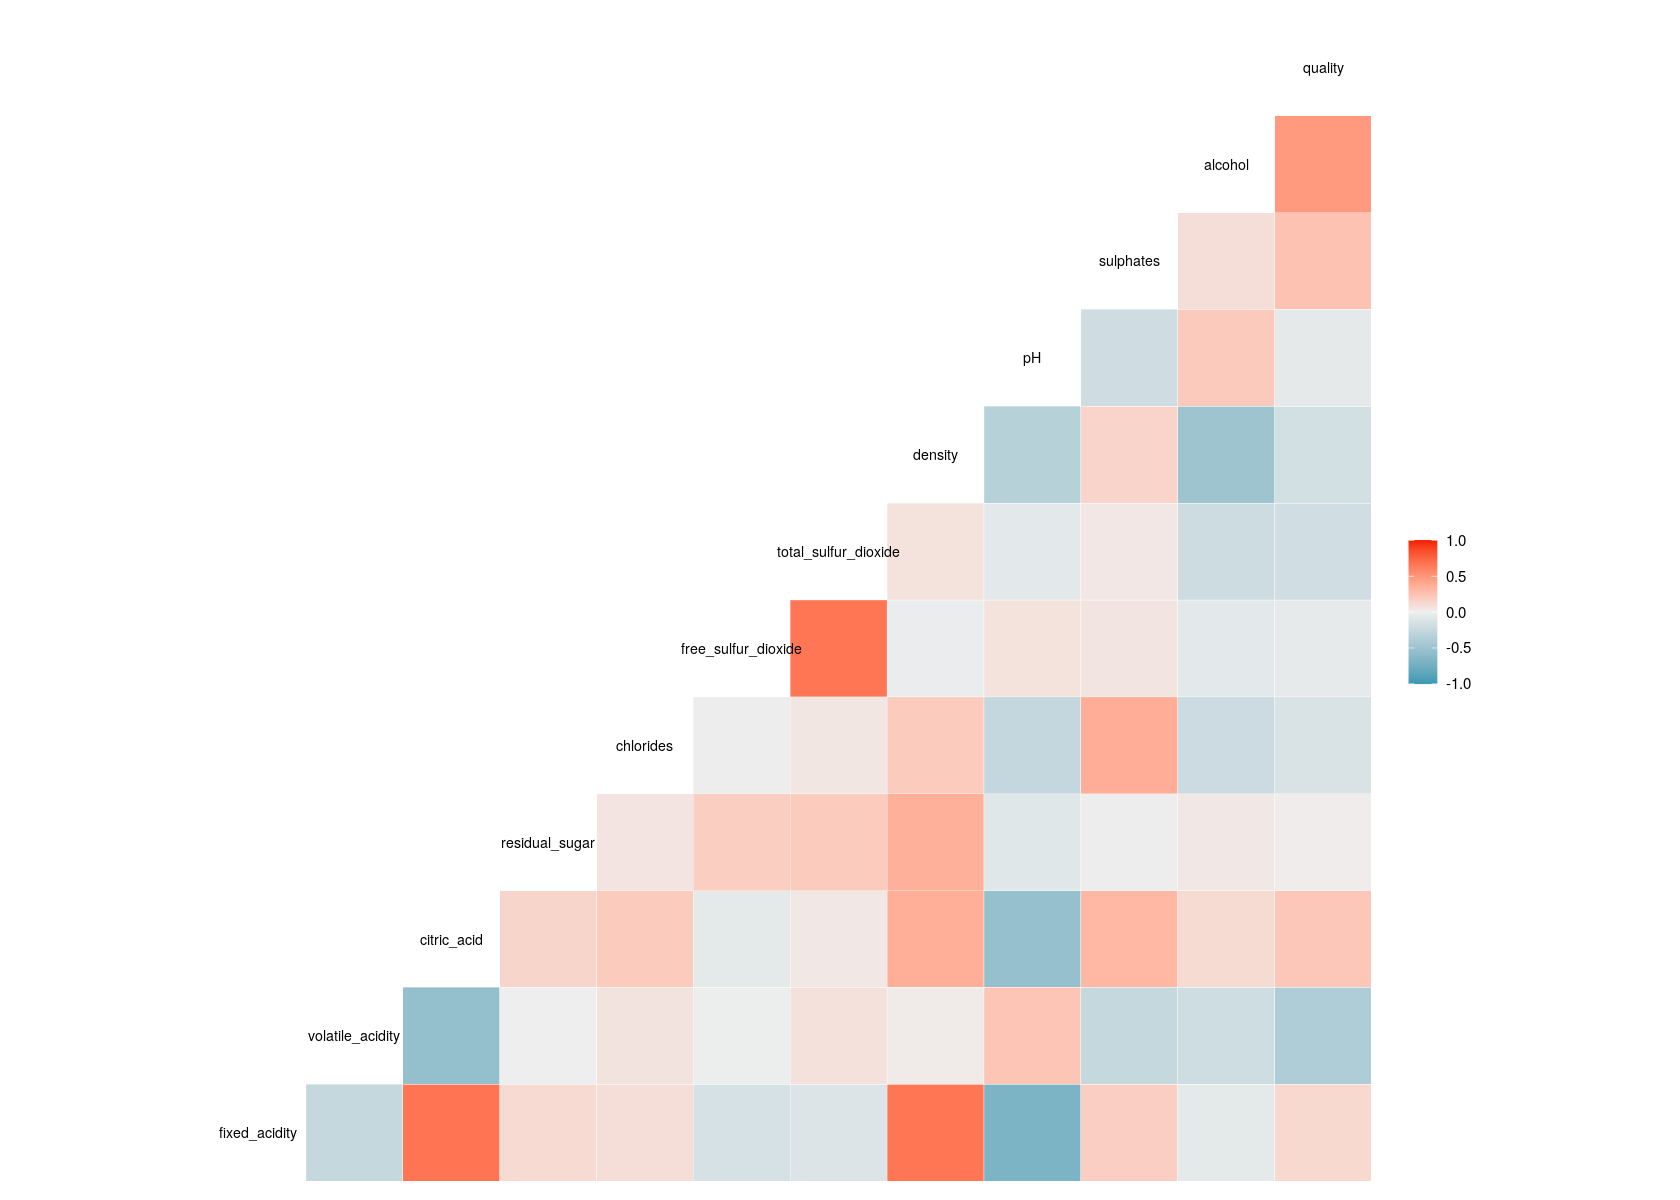

In [23]:
ggcorr(
  wine_raw, 
  method = c("everything", "pearson"),
  size = 3
  )

De las anteriores matrices y gráficas podemos observar algunas nuevas correlaciones de interés, por ejemplo, entre el pH y la acidéz. Podemos observar además que para la **CTQ** aproximadamente la mitad de las variables independientes correlacionan positivamente y la otra mitad negativamente.

En la práctica, se seleccionan las variables independientes que tienen las medidas de asociación más altas en la medida que nos aportan más información. Una regla de oro sencilla es excluir variables que tengan una correlación menor (en valor absoluto) a 0.2.

### Examen detallado de variables de interés

De nuestro conjunto de datos iniciales hemos detectado ciertas variables independientes o explicativas que nos pueden aportar mayor información para explicar la calidad del vino.

- volatile_acidity
- citric_acid
- sulphates
- alcohol

Vamos ahora a examinarlas individualmente por medio de un **boxplot** en el que cruzaremos los valores de cada una con la puntuación obtenida en el vino.

Se puede utilizar la representación con boxplot porque los valores de tienen una relación ordinal ($1 < 2$, $2 < 3$...), los valores van incrementando, se mide una misma cosa, tiene una única dirección (sin puntos medios).

#### volatile_acidity

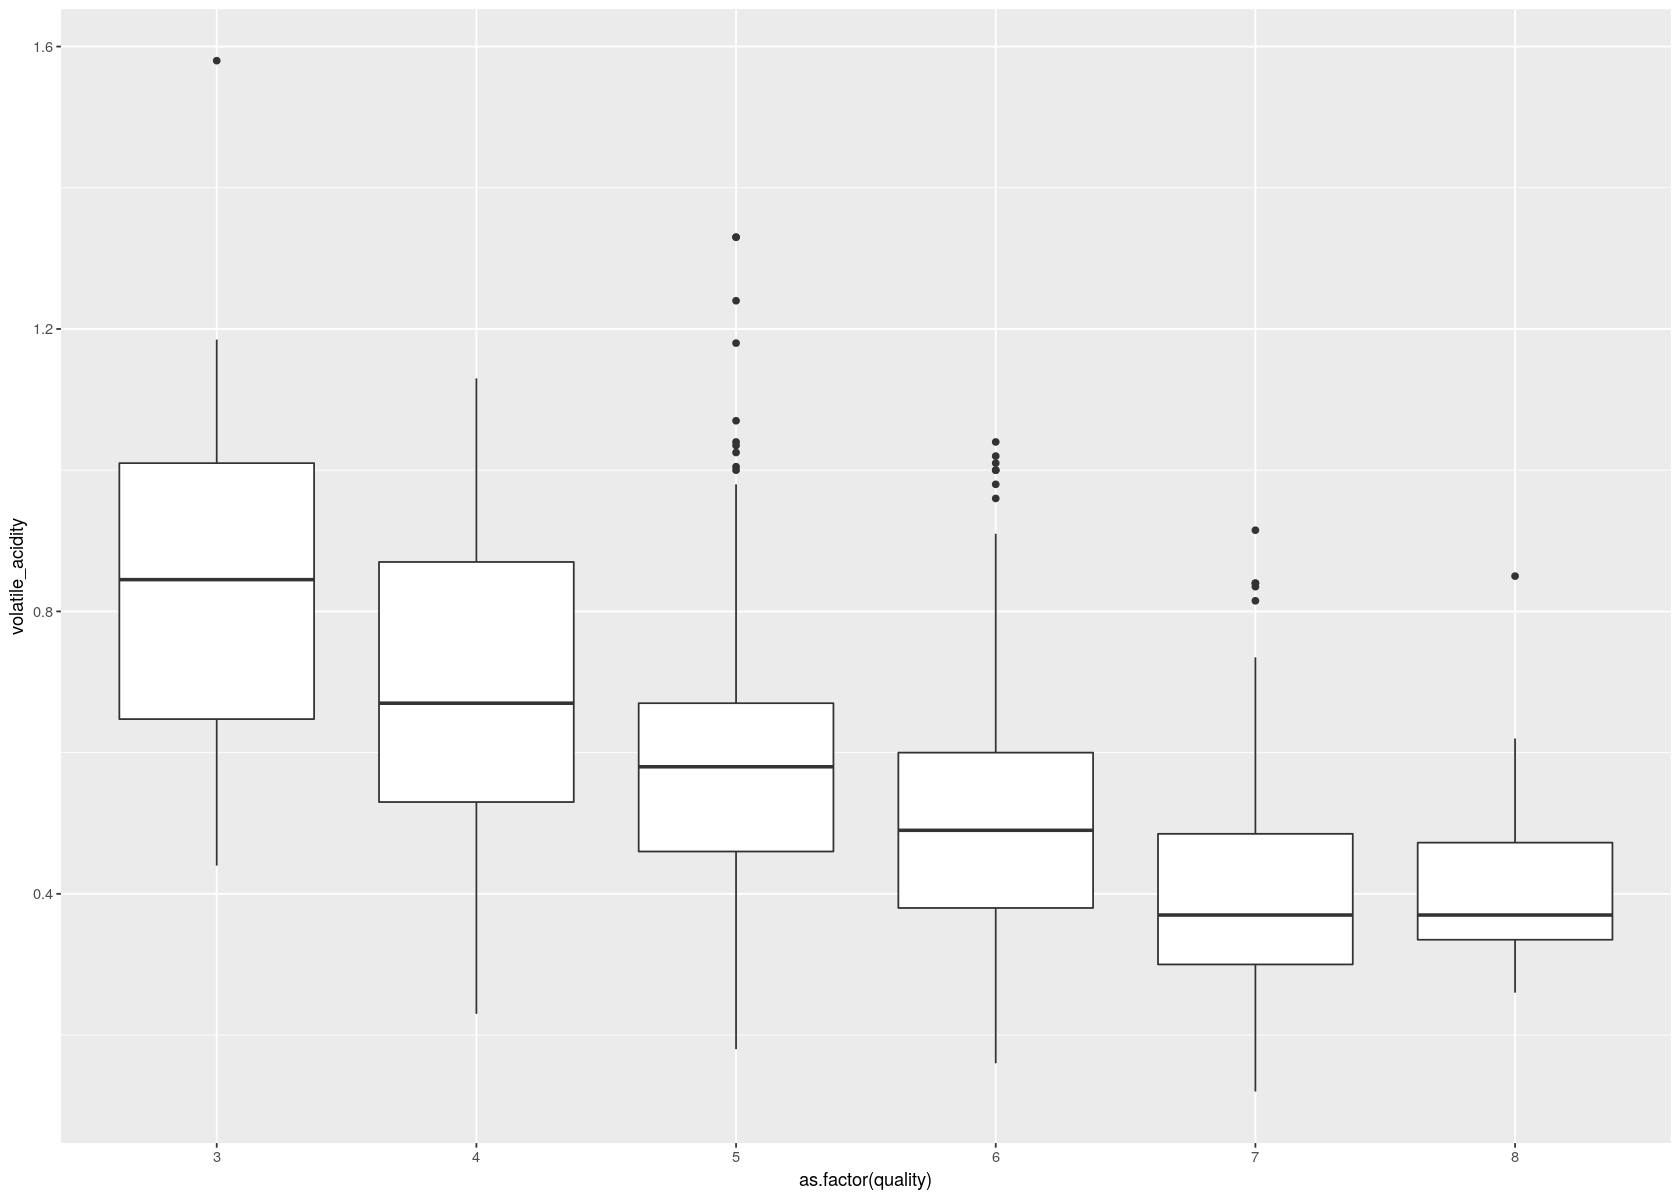

In [24]:
p <- ggplot(wine_raw, aes(as.factor(quality), volatile_acidity))
p + geom_boxplot()

#### citric_acid

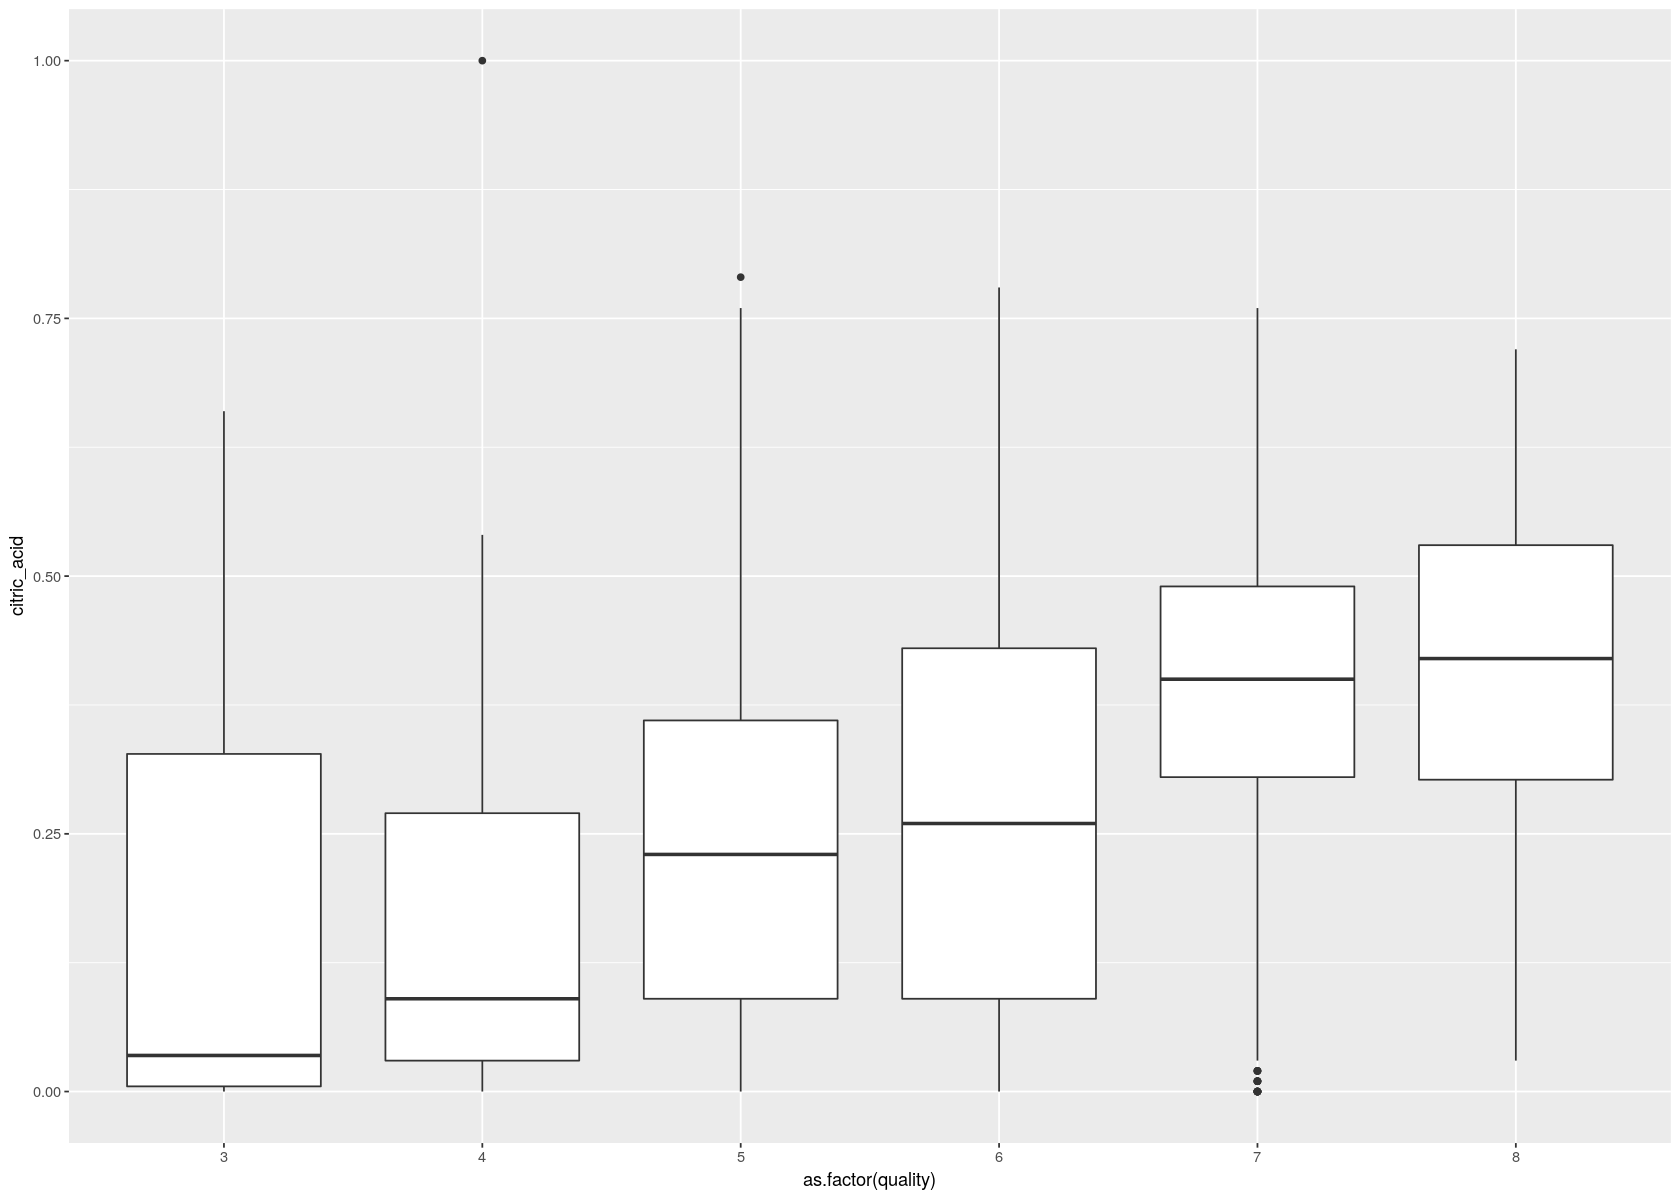

In [25]:
p <- ggplot(wine_raw, aes(as.factor(quality), citric_acid))
p + geom_boxplot()

#### sulphates

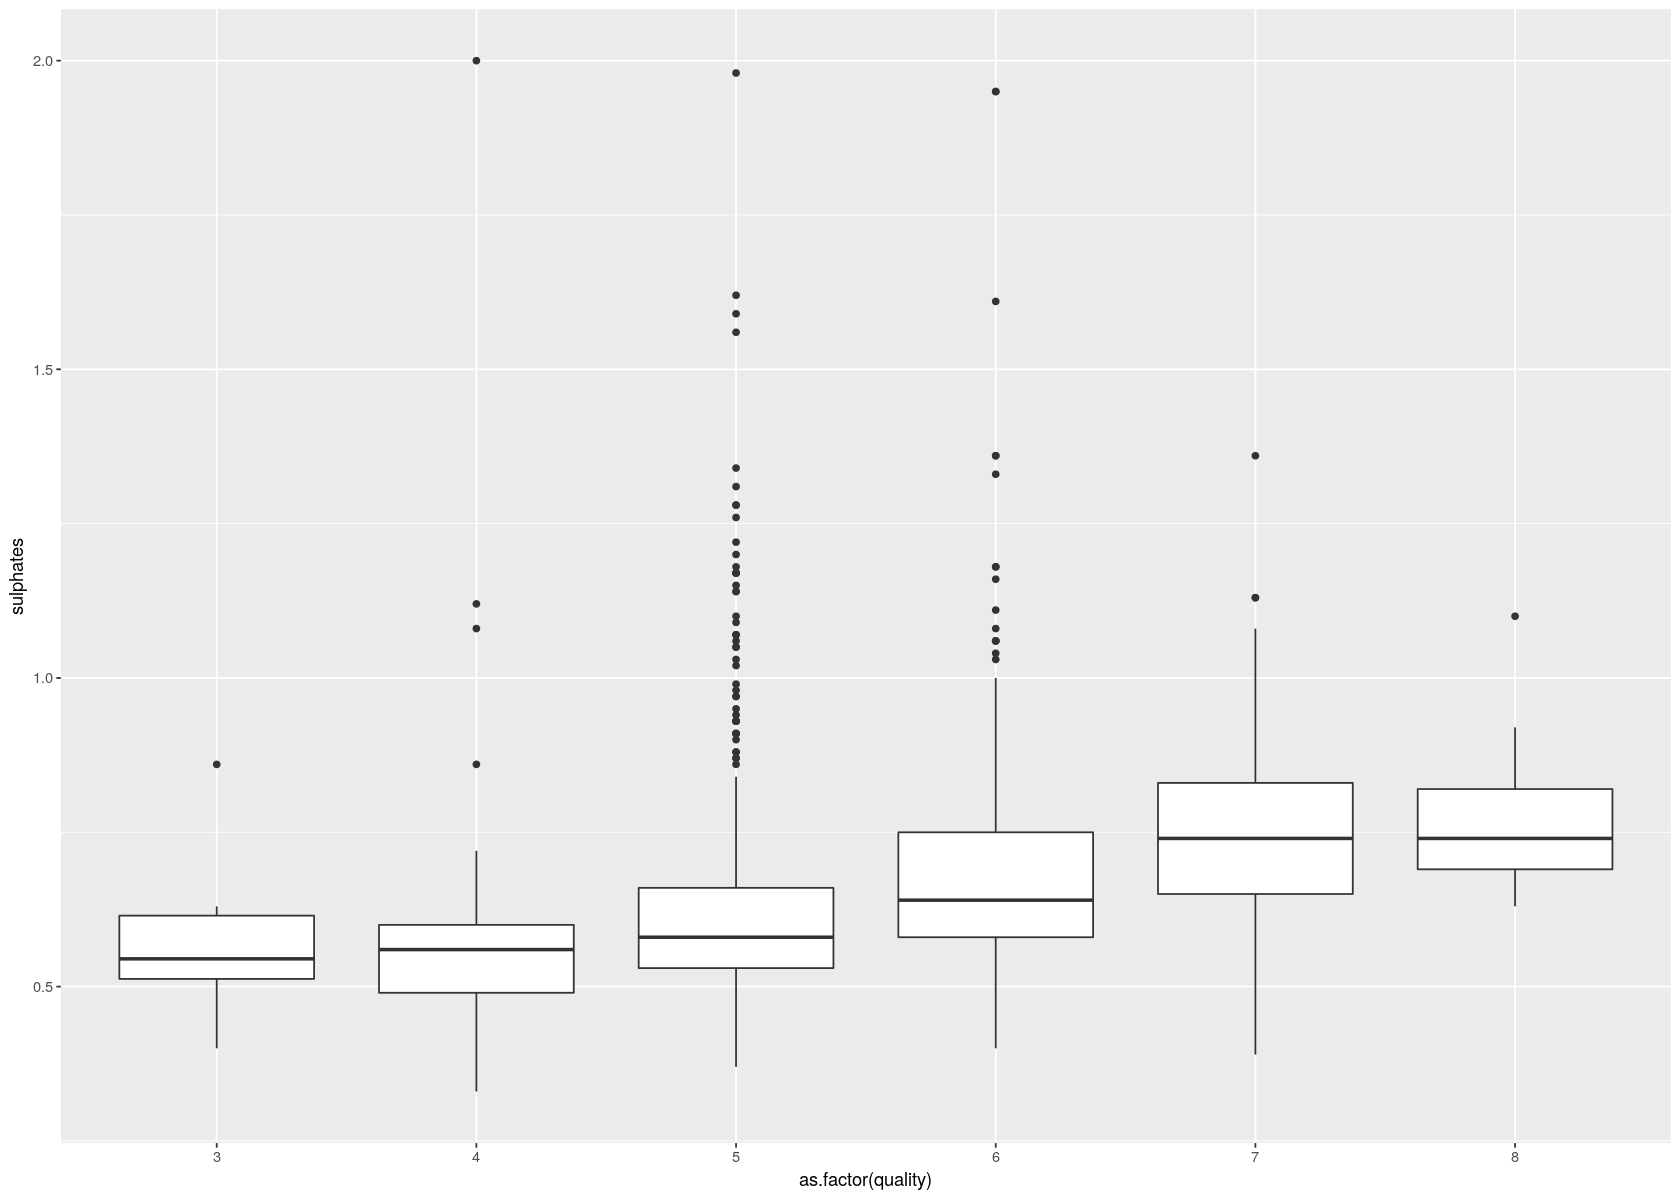

In [26]:
p <- ggplot(wine_raw, aes(as.factor(quality), sulphates))
p + geom_boxplot()

#### alcohol

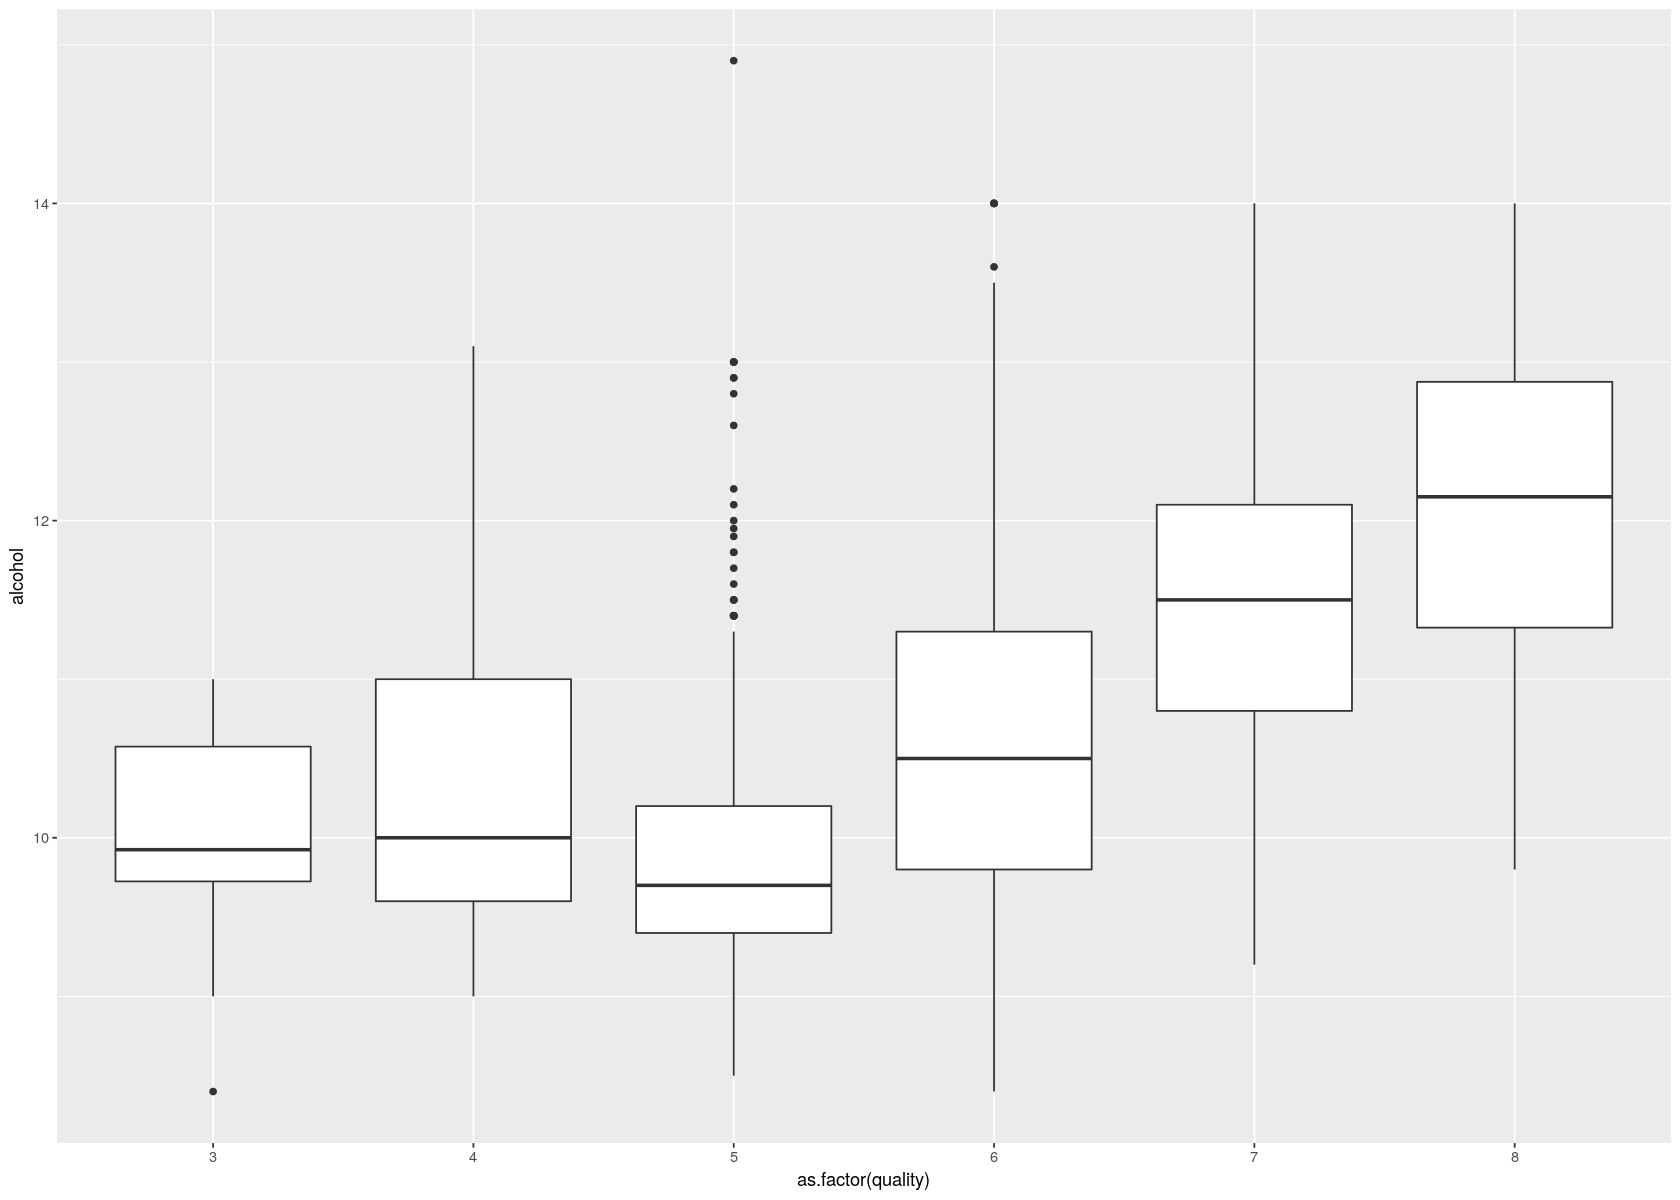

In [27]:
p <- ggplot(wine_raw, aes(as.factor(quality), alcohol))
p + geom_boxplot()

En nuestro conjunto de datos todas las variables son contínuas. El cálculo de medidas de resumen bivariadas como las covarianzas o coeficientes de correlación, así como los resúmenes gráficos vistos, nos permiten tener una idea bien formada de si existen relaciones entre las variables y el sentido de dichas relaciones.

Vamos ahora a examinar cómo podemos hacer el mismo proceso de análisis cuando tenemos variables **categóricas**.

In [28]:
## Partimos de la base de datos 'wine_raw'
## y la ontroducimos a un algoritmo de operaciones
wine_raw %>%
  ## mutate() crea una nueva variable llamada 'calidad'
  ## basada en los rangos ya conocidos de la variable quality
  mutate(
    calidad = ifelse(
      quality == '3' | quality == '4','baja',
      ifelse(
        quality == '5' | quality == '6','media',
        'alta'))
  ) %>% 
  ## mutate_at() recibe la columna 'calidad' y la convierte en un factor
  mutate_at('calidad', factor) %>%
  
  ## mutate() crea una nueva variable llamada 'acetico'
  ## basada en rangos conocidos de la variable 'volatile_acidity'
  mutate(
    acetico = ifelse(volatile_acidity < 0.7, 'bajo', 'alto')
  ) %>% 
  ## mutate_at() recibe la columna 'acetico' y la convierte en un factor
  ## el resultado de todas las operaciones se guarda en 'wine_processed'
  mutate_at('acetico', factor) -> wine_processed

Dado que transformamos nuestro conjunto de datos para agregar dos nuevas columnas categóricas, podemos explorar algunas medidas y gráficas relevantes para asociar 1) una variable categórica con una contínua, 2) dos variables categóricas.

### Asociación entre una variable categórica y una variable contínua

En este caso no podemos calcular covarianzas ni correlaciones de Pearson, luego debemos disponer de otro conjunto de herramientas.

- Correlación biserial-puntual. Sirve para cruzar una columna numérica con una variable categórica **binaria**.
- Regresión logística. Se trata de predecir una variable categórica en función de una continua.
- Prueba de Kruskall-Wallis. Es un test que sirve para mirar si existe una relación entre una variable categórica y una continua.

Por facilidad, haremos una **prueba de Kruskall-Wallis** cuyo p-valor nos indicará si existe una relación significante entre las variables.

- **Hipótesis nula:** las variables son independientes.
- **Hipótesis alternativa:** las variables son dependientes.


In [29]:
# Hipótesis -> nula
# Resultado: Cercano a cero -> se rechaza la hipótesis
# Conclusión: el ácido volátil afecta la percepción de calidad
kruskal.test(wine_processed$volatile_acidity, wine_processed$calidad)


	Kruskal-Wallis rank sum test

data:  wine_processed$volatile_acidity and wine_processed$calidad
Kruskal-Wallis chi-squared = 168.44, df = 2, p-value < 2.2e-16


In [30]:
kruskal.test(wine_processed$citric_acid, wine_processed$calidad)


	Kruskal-Wallis rank sum test

data:  wine_processed$citric_acid and wine_processed$calidad
Kruskal-Wallis chi-squared = 86.083, df = 2, p-value < 2.2e-16


In [31]:
kruskal.test(wine_processed$sulphates, wine_processed$calidad)


	Kruskal-Wallis rank sum test

data:  wine_processed$sulphates and wine_processed$calidad
Kruskal-Wallis chi-squared = 147.44, df = 2, p-value < 2.2e-16


In [32]:
kruskal.test(wine_processed$alcohol, wine_processed$calidad)


	Kruskal-Wallis rank sum test

data:  wine_processed$alcohol and wine_processed$calidad
Kruskal-Wallis chi-squared = 234.32, df = 2, p-value < 2.2e-16


#### Visualización

En este caso podemos construir un boxplot para cruzar cada grupo de calidad con las variables de interés.

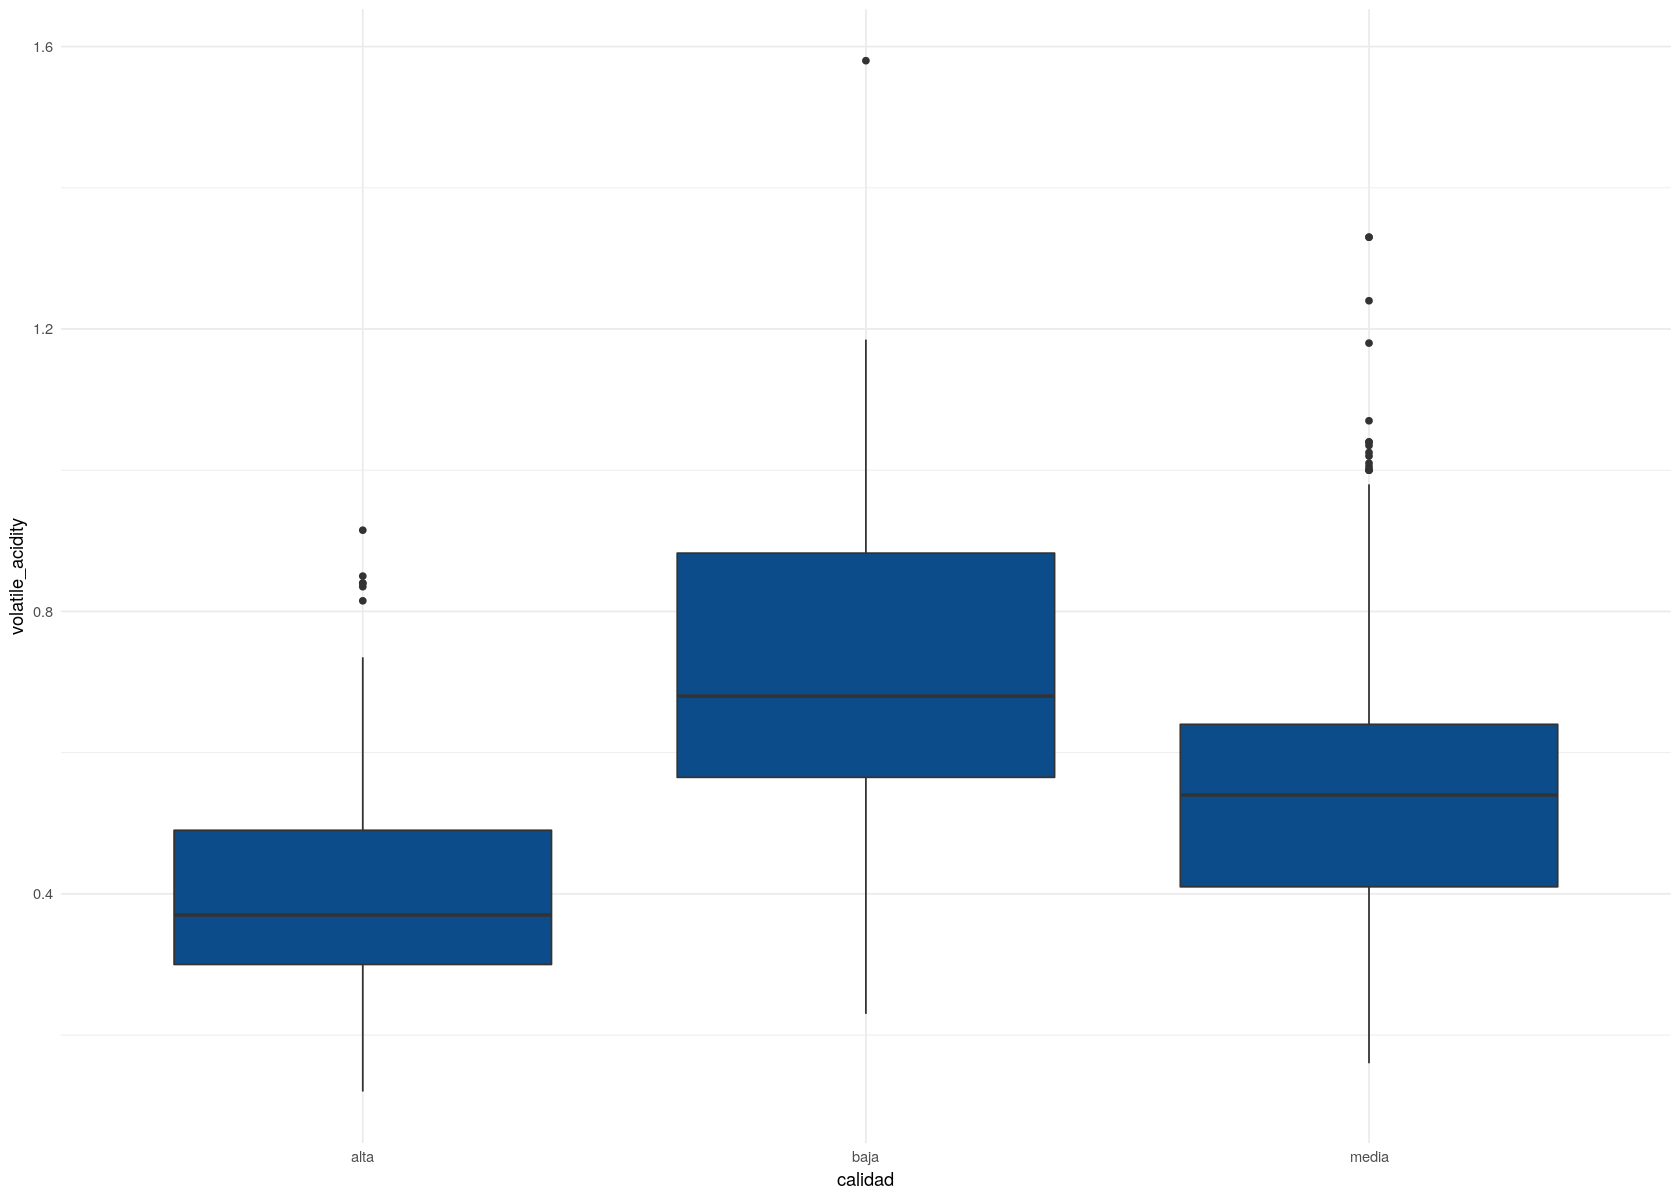

In [33]:
ggplot(data = wine_processed) +
  aes(x = calidad, y = volatile_acidity) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

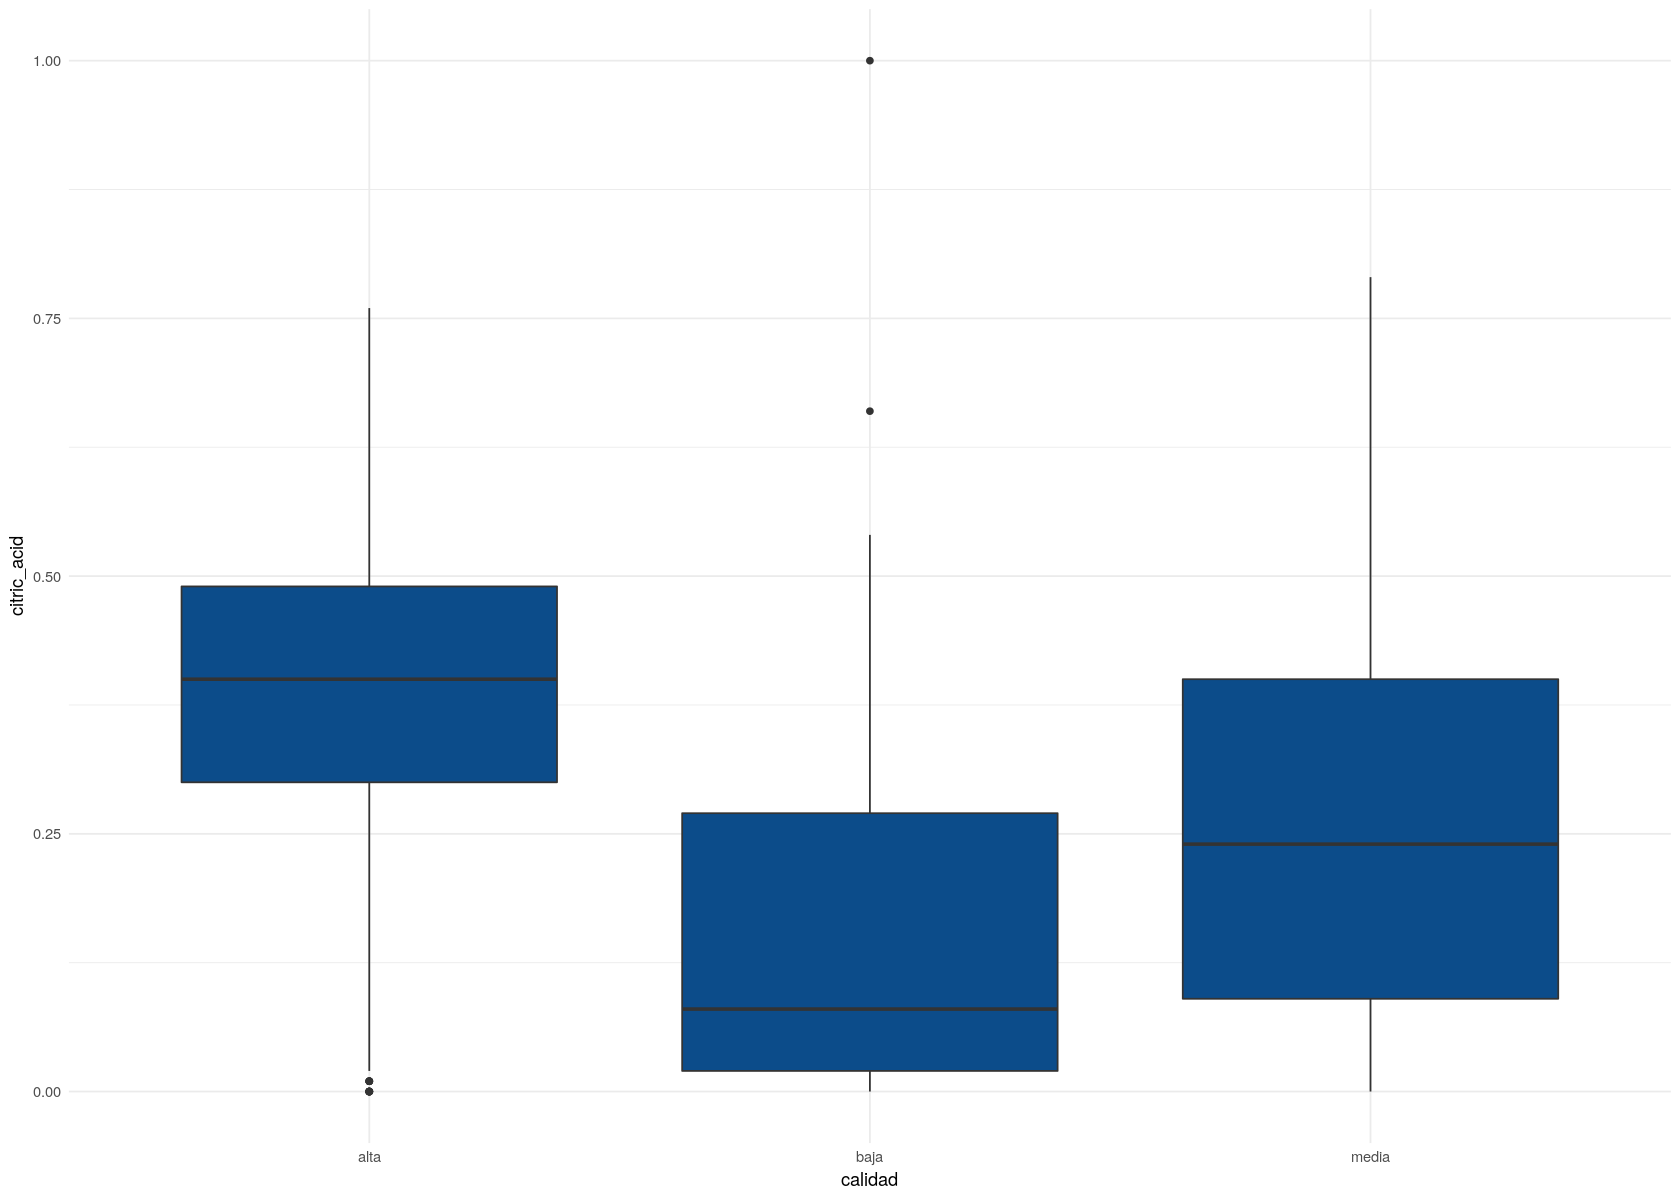

In [34]:
ggplot(data = wine_processed) +
  aes(x = calidad, y = citric_acid) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

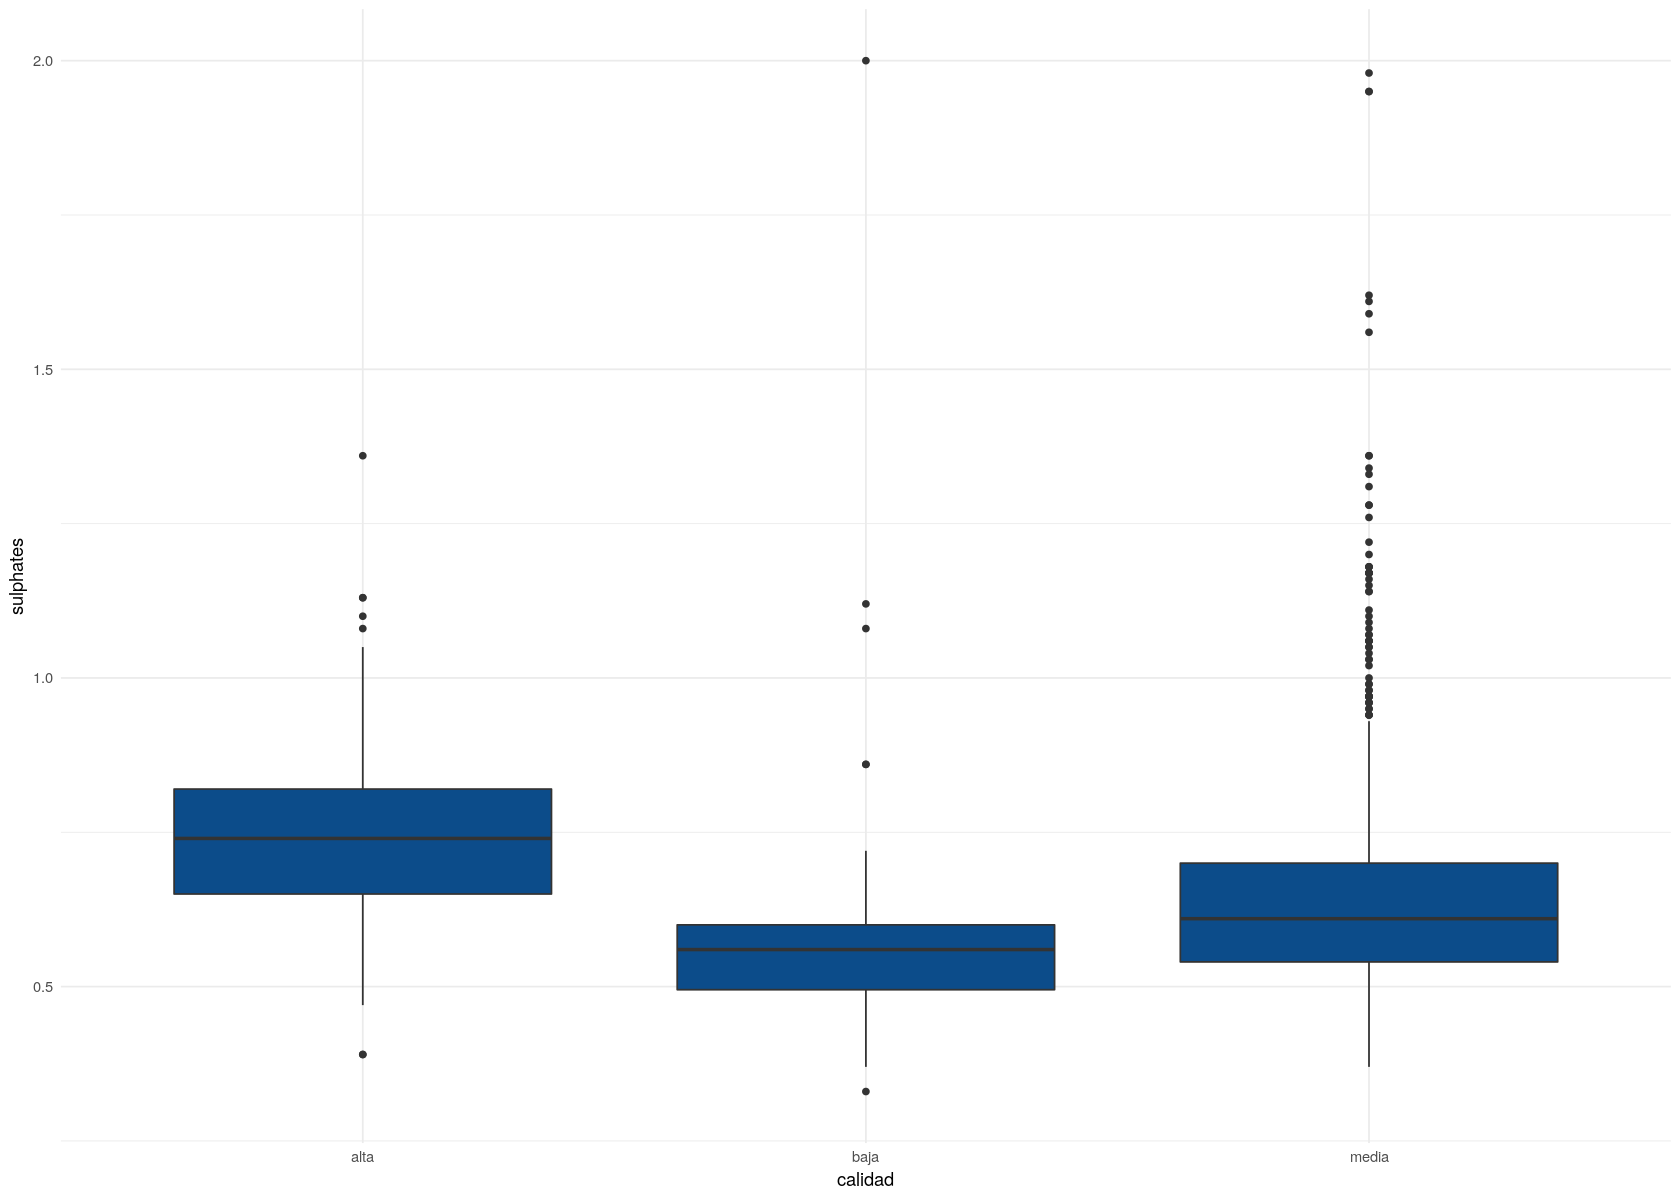

In [35]:
ggplot(data = wine_processed) +
  aes(x = calidad, y = sulphates) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

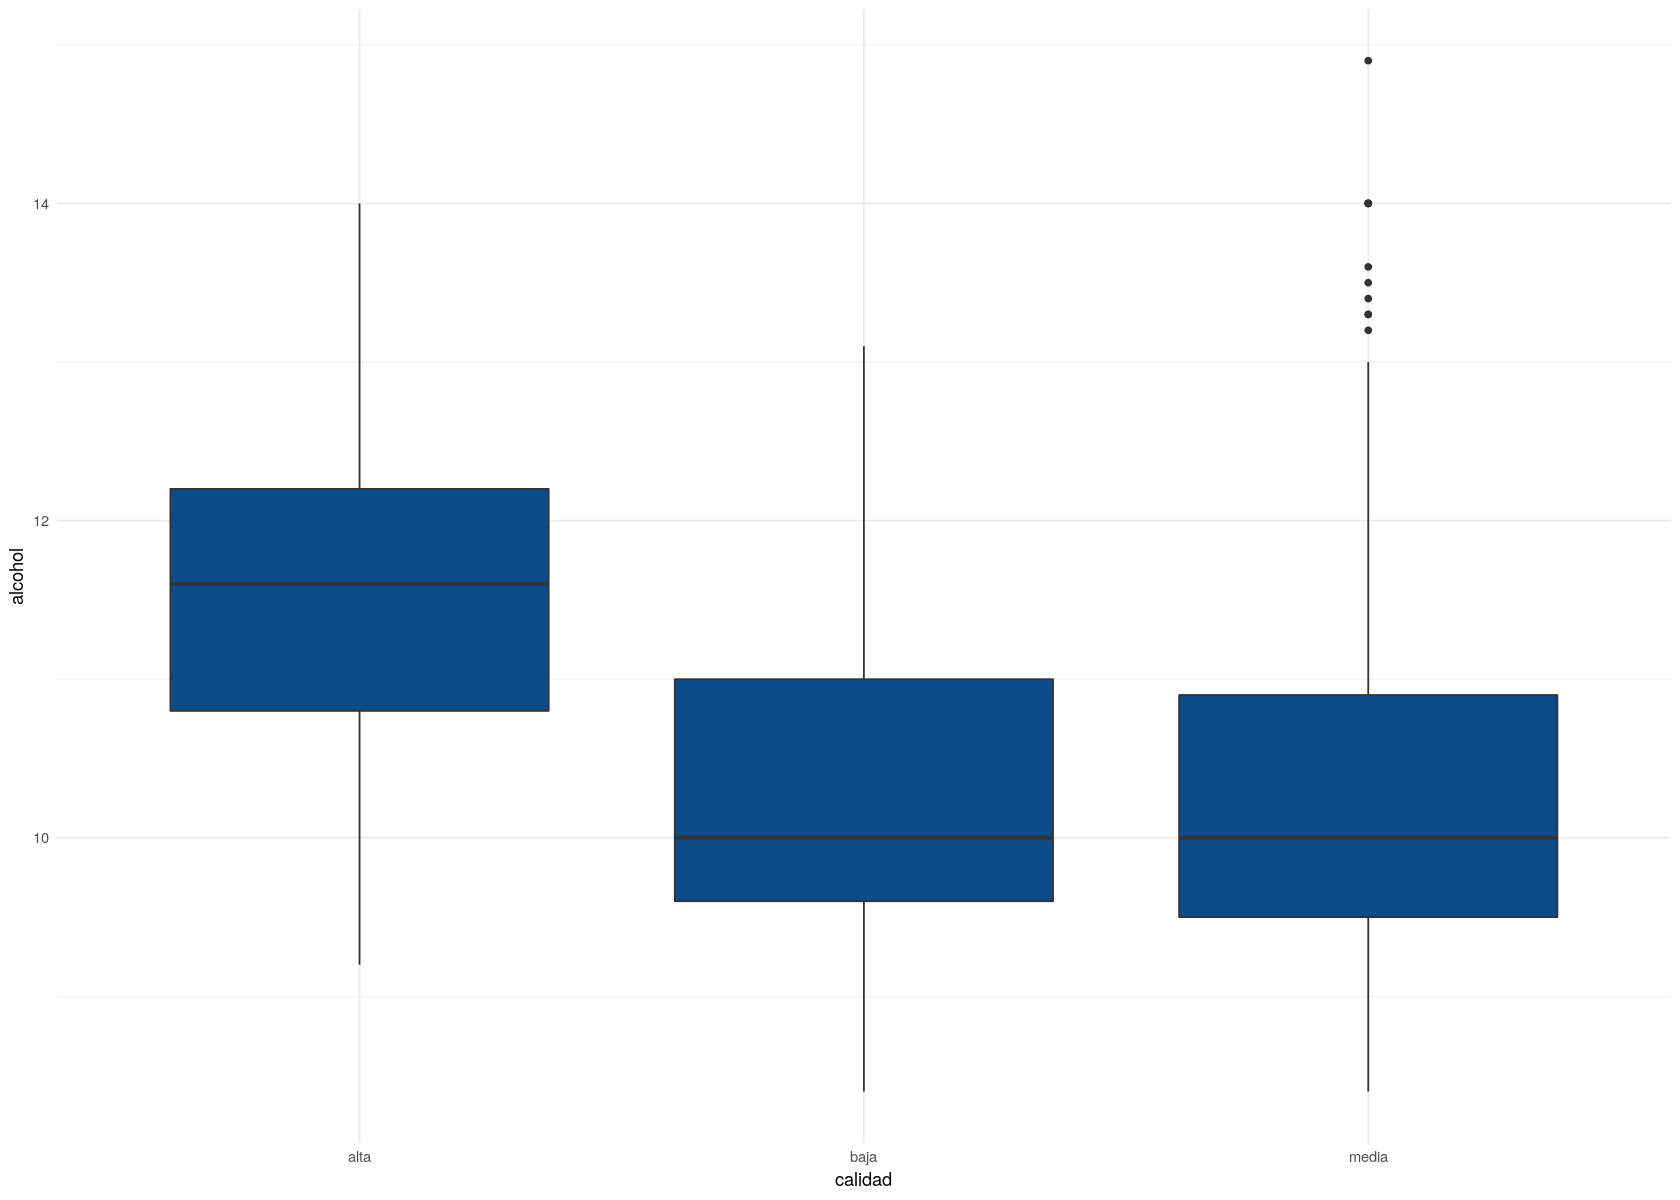

In [36]:
ggplot(data = wine_processed) +
  aes(x = calidad, y = alcohol) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

### Asociación entre dos variables categóricas

En este caso conviene hacer análisis mediante tablas de contingencia, las cuales cuentan las frecuencias observadas en cada categoría.

In [37]:
tbl = table(wine_processed$acetico, wine_processed$calidad) 
tbl

      
       alta baja media
  alto    7   29   197
  bajo  210   34  1122

In [38]:
# Damos nombre a las columnas y las filas 
colnames(tbl) <- c("Calidad alta", "Calidad baja", "Calidad media")
rownames(tbl) <- c("Ácido acético alto","Ácido acético bajo")
tbl

                    
                     Calidad alta Calidad baja Calidad media
  Ácido acético alto            7           29           197
  Ácido acético bajo          210           34          1122

Al tener conformada la tabla de contingencia, la forma de revisar si existe una asociación entre las variables es por medio de una **prueba de independencia $X^2$** (Chi-Cuadrado).

La prueba indicará si dos características son independientes o tienen una asociación, de manera que las frecuencias elevadas en una de ellas suele ser acompañado con frecuencias altas en la otra.

- **Hipótesis nula:** las columnas y las filas de la tabla son independientes
- **Hipótesis alternativa:** las columnas y las filas son dependientes


In [39]:
## Prueba Chi-Cuadrado
chisq.test(tbl)


	Pearson's Chi-squared test

data:  tbl
X-squared = 72.67, df = 2, p-value < 2.2e-16


## Observaciones de cierre

Identificar las relaciones existentes entre dos o más variables es parte arte y parte ciencia, por lo que se recomienda ganar experiencia leyendo articulos cientificos y viendo soluciones a diversos problemas.

Además,

1. Hay que procurar trabajar con **variables informativas**, es decir, que guarden una relación con la variable objetivo.
2. Hay que evitar las redundancias, luego lo ideal es que nuestras variables explicativas/independientes/features sean **independientes** entre sí.
3. Nuestra intuición puede fallar en dimensiones superiores a 3. En la mayoría de los casos aumentar la cantidad de variables afecta negativamente el entendimiento de un problema si no contamos con una gran cantidad de datos. Por ultimo, una **cantidad controlada de variables** asegura una mejor interpretabilidad de los análisis y modelos.

